### <u> Chosen datasets: <u>

### Diabetes: https://www.openml.org/search?type=data&sort=runs&status=active&id=37  (Classification)

### Insurance: https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download (Regression)

### Mall Customer Segmentation: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python (Unsupervised)

## <u> Supervised Learning <u>

## Classification
    
#### Diabetes Dataset: https://www.openml.org/search?type=data&sort=runs&status=active&id=37

<u> Variables <u>

Pregnancies,
Glucose,
BloodPressure,
SkinThickness,
Insulin,
BMI,
Diabetes Pedigree Function,
Age,
Outcome

In [1173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics, linear_model
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [1174]:
df3 = pd.read_csv("Datasets/classification-diabetes.csv")  # Importing the dataset
df3

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [1175]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [1176]:
df3.rename(columns={"DiabetesPedigreeFunction": "PedigreeF"}, inplace=True)

In [1177]:
# Some of the entries in the predictor variables are 0 such as skin thickness and insulin - 
# this does not make sense and needs to be fixed.

# Replacing with NaN to replace them later

df3[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df3[['Glucose','BloodPressure',
                                                                          'SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [1178]:
df3.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
PedigreeF          0
Age                0
Outcome            0
dtype: int64

In [1179]:
df3['Outcome'].value_counts() # This shows our data is imbalanced towards non-diabetic cases

0    500
1    268
Name: Outcome, dtype: int64

In [1180]:
df3.describe()  
# This shows some variables have skewness in the data (mean > median) - 
# hence we will use the median to replace nulls since median is not affected by outliers

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI   PedigreeF         Age     Outcome  
count  757.000000  768.000000  768.000000  768.000000  
mean    32.457464    0.471876   33.240885    0.348958  
std      6.924988    0.331329   11.760232    0.476951  
min     18.200000    0.078000   21.000000    0.000000  
25%     27.500000    0.243750   24.000000    0.000000  
50%     32.300000    0.372500   29.000000    0.000000  
75%     36.600000    0.626250   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

In [1181]:
# Replacing NaN values with the median of that variable

df3.groupby('Outcome').median()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Outcome                                                                      
0                2.0    107.0           70.0           27.0    102.5  30.1   
1                4.0    140.0           74.5           32.0    169.5  34.3   

         PedigreeF   Age  
Outcome                   
0            0.336  27.0  
1            0.449  36.0

In [1182]:
df3.loc[(df3['Outcome'] == 0 ) & (df3['Glucose'].isnull()), 'Glucose'] = 107
df3.loc[(df3['Outcome'] == 1 ) & (df3['Glucose'].isnull()), 'Glucose'] = 140

df3.loc[(df3['Outcome'] == 0 ) & (df3['BloodPressure'].isnull()), 'BloodPressure'] = 70
df3.loc[(df3['Outcome'] == 1 ) & (df3['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

df3.loc[(df3['Outcome'] == 0 ) & (df3['SkinThickness'].isnull()), 'SkinThickness'] = 27
df3.loc[(df3['Outcome'] == 1 ) & (df3['SkinThickness'].isnull()), 'SkinThickness'] = 32

df3.loc[(df3['Outcome'] == 0 ) & (df3['Insulin'].isnull()), 'Insulin'] = 102.5
df3.loc[(df3['Outcome'] == 1 ) & (df3['Insulin'].isnull()), 'Insulin'] = 169.5

df3.loc[(df3['Outcome'] == 0 ) & (df3['BMI'].isnull()), 'BMI'] = 30.1
df3.loc[(df3['Outcome'] == 1 ) & (df3['BMI'].isnull()), 'BMI'] = 34.3

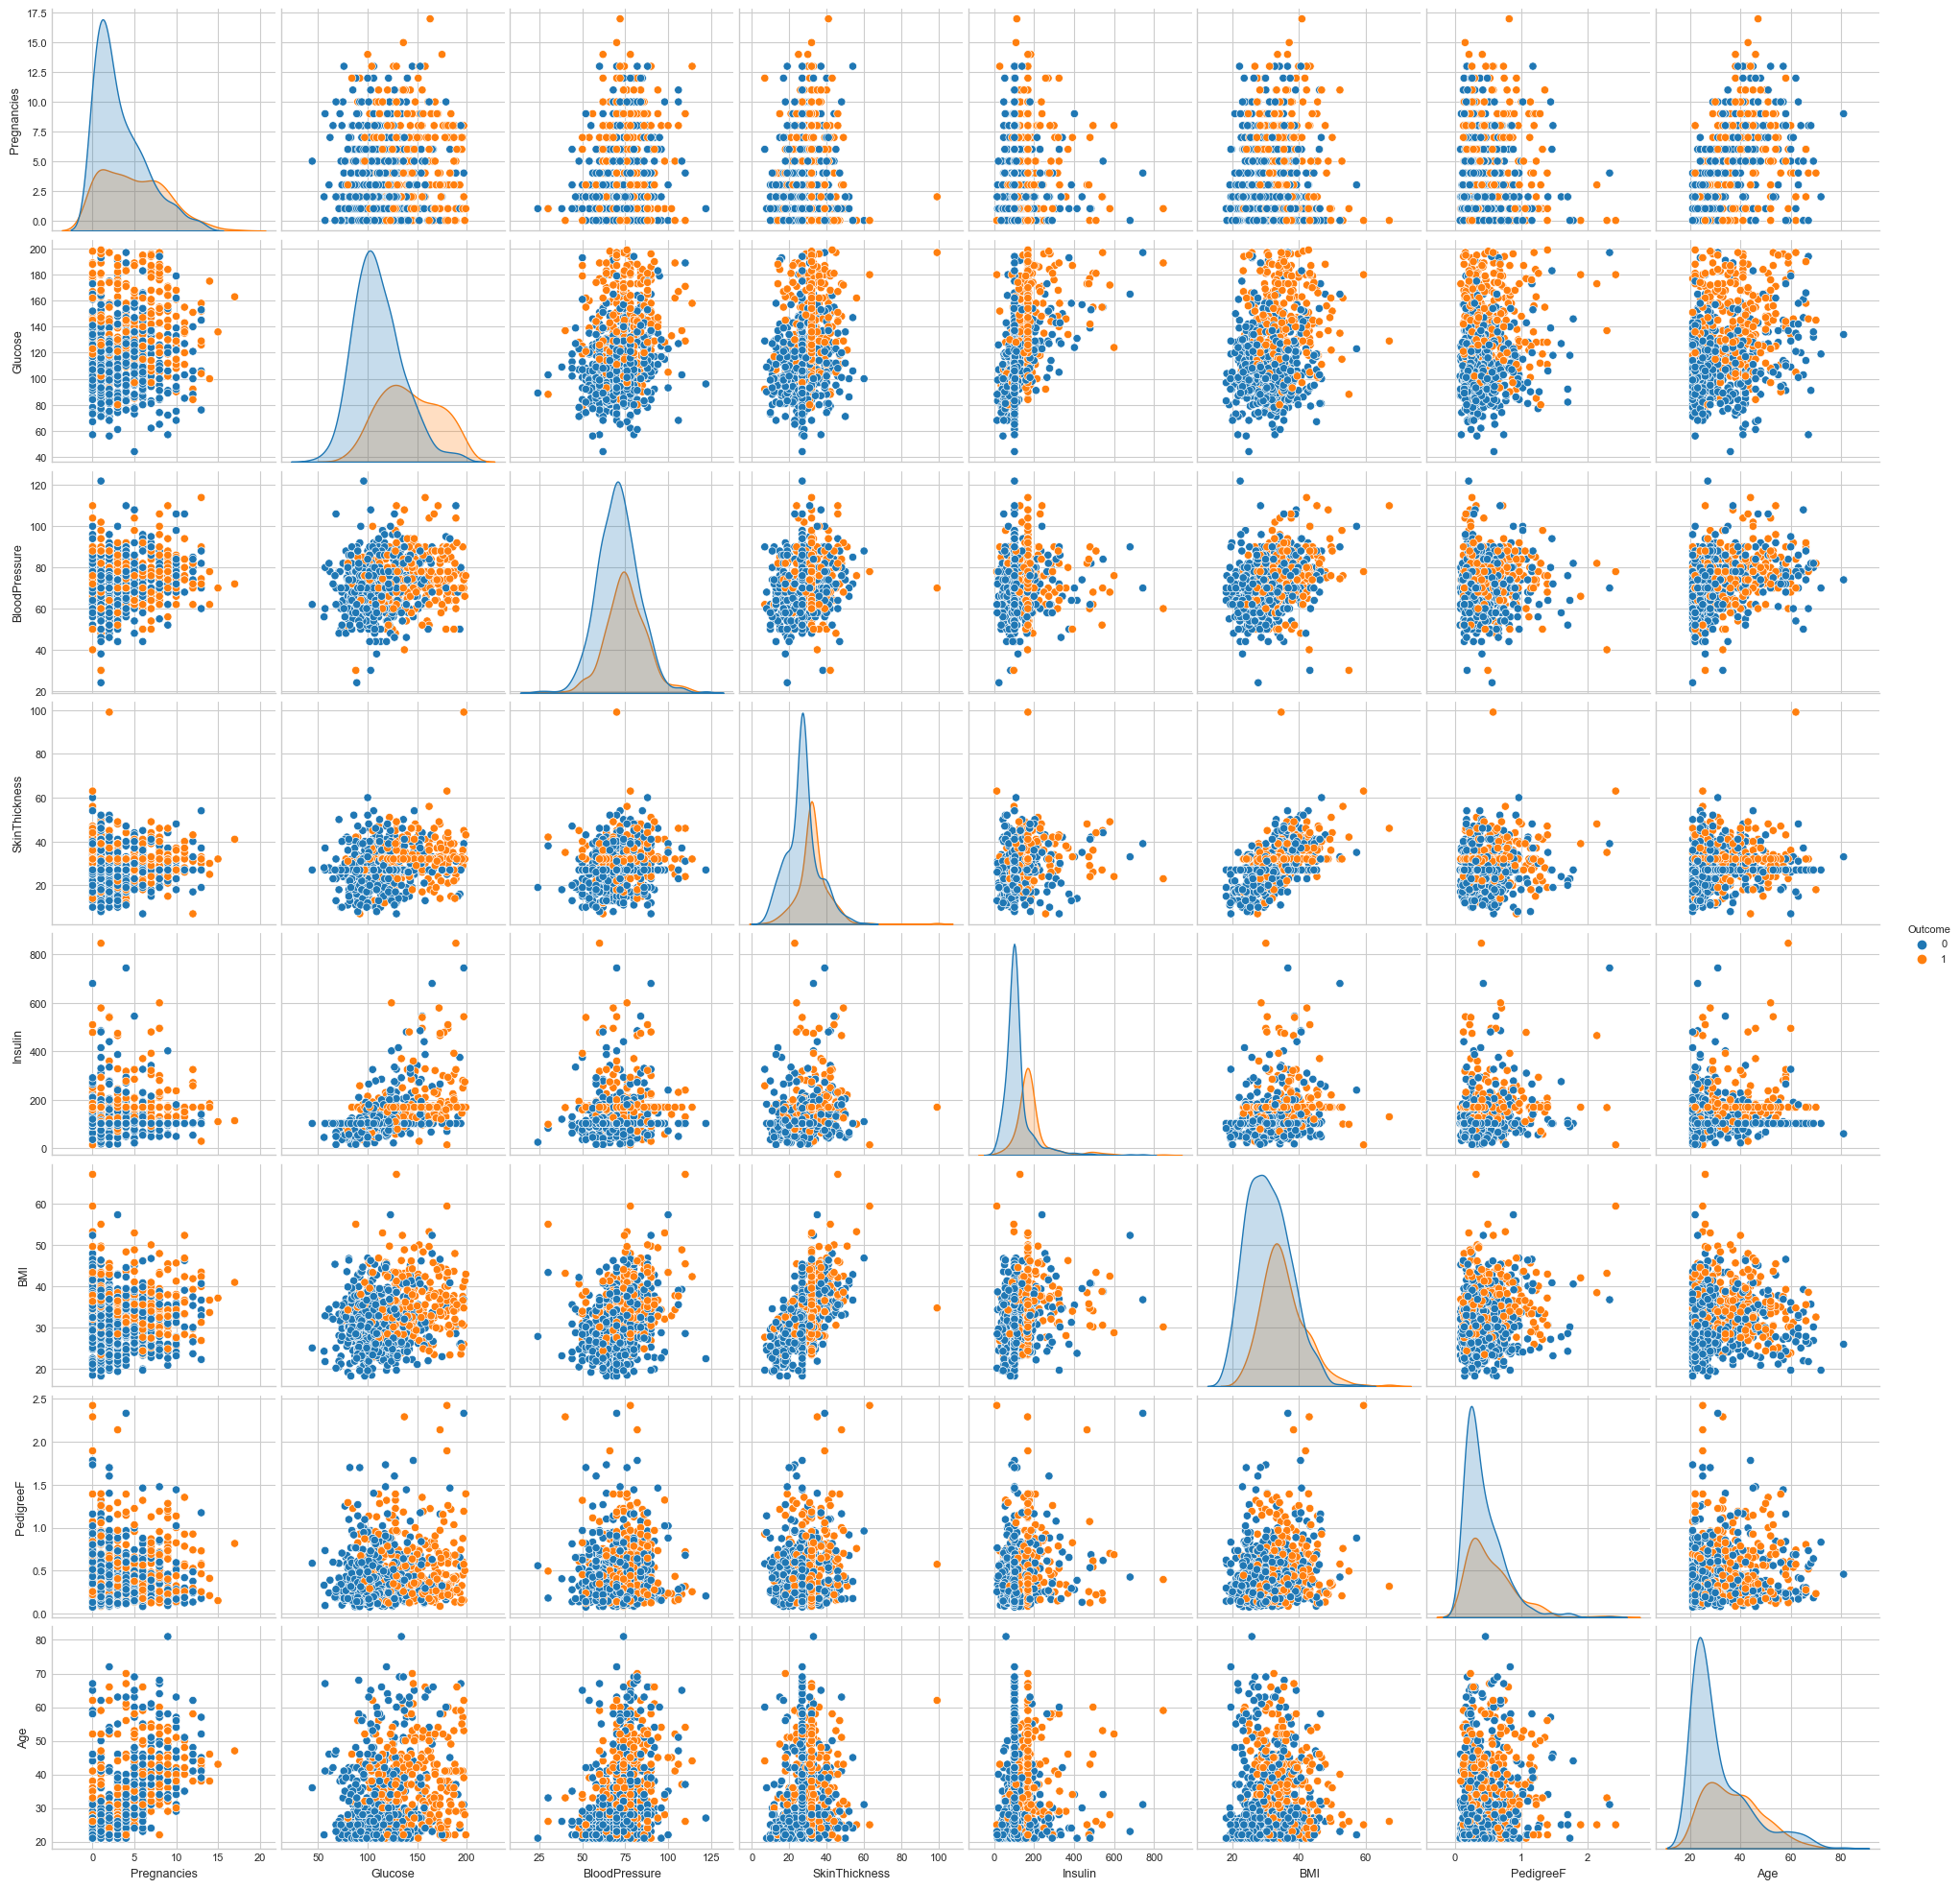

In [1183]:
sns.pairplot(df3, hue='Outcome')

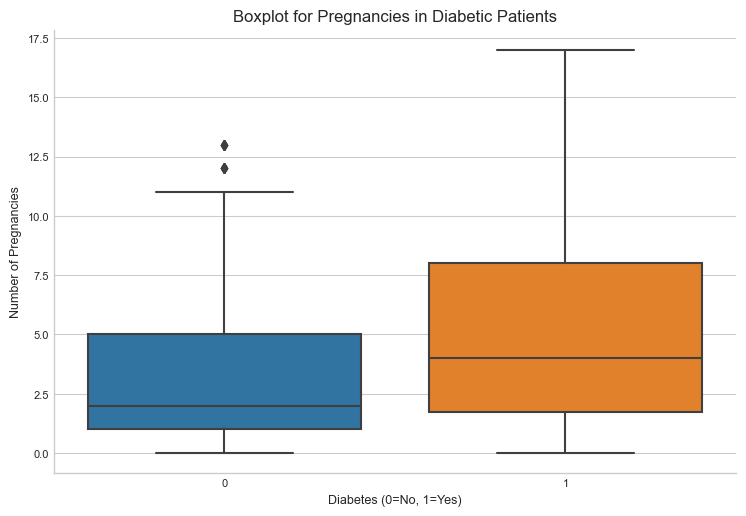

In [1312]:
sns.catplot(x='Outcome', y='Pregnancies', data=df3, kind='box', aspect=1.5)
plt.title("Boxplot for Pregnancies in Diabetic Patients")
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel("Number of Pregnancies")
plt.show()

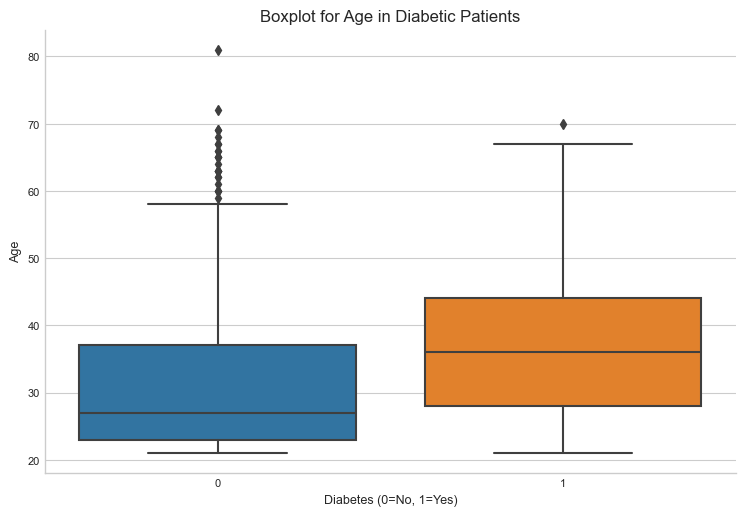

In [1311]:
sns.catplot(x='Outcome', y='Age', data=df3, kind='box', aspect=1.5)
plt.title("Boxplot for Age in Diabetic Patients")
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel("Age")
plt.show()

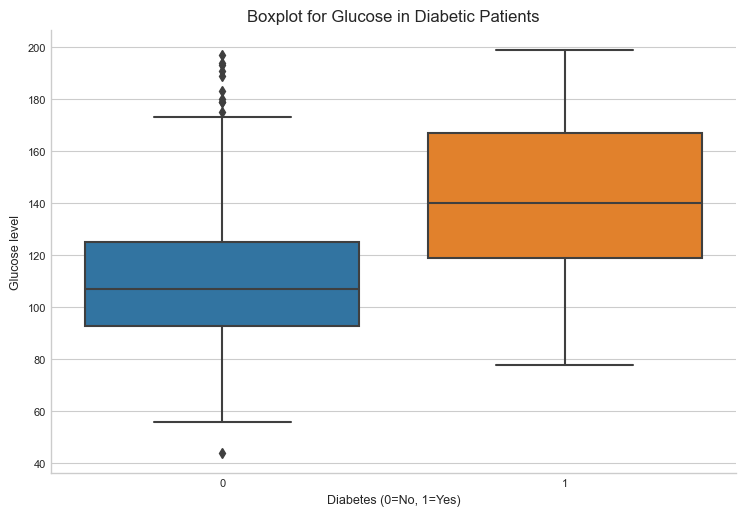

In [1186]:
sns.catplot(x='Outcome', y='Glucose', data=df3, kind='box', aspect=1.5)
plt.title("Boxplot for Glucose in Diabetic Patients")
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel("Glucose level")
plt.show()

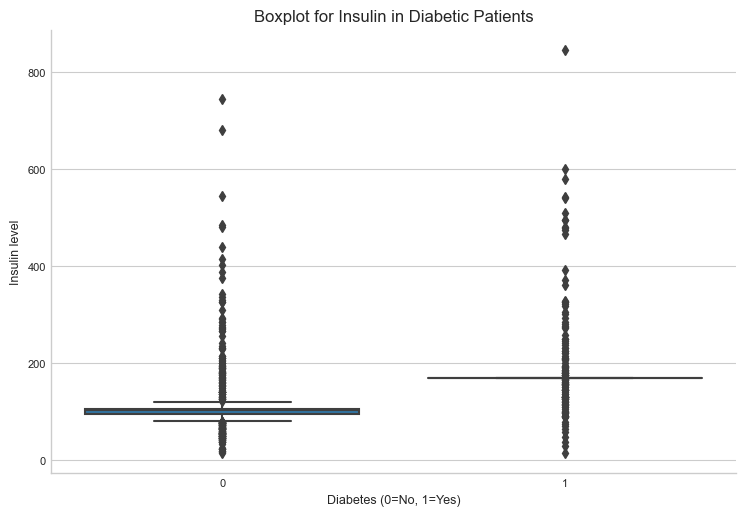

In [1187]:
sns.catplot(x='Outcome', y='Insulin', data=df3, kind='box', aspect=1.5)
plt.title("Boxplot for Insulin in Diabetic Patients")
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel("Insulin level")
plt.show()

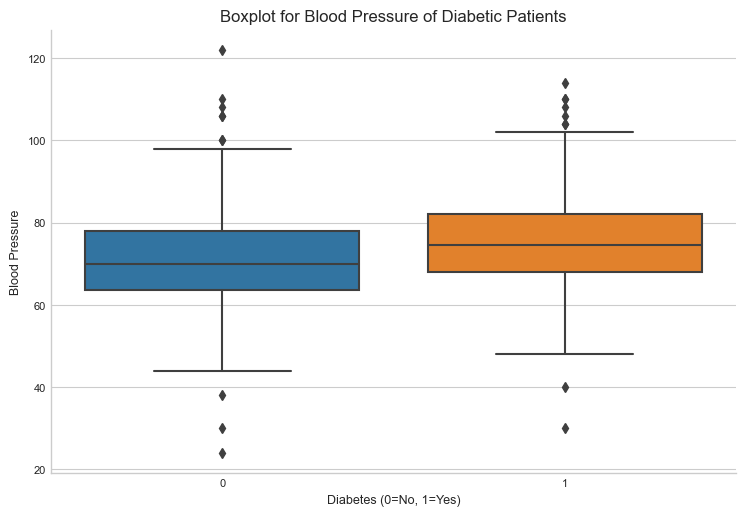

In [1188]:
sns.catplot(x='Outcome', y='BloodPressure', data=df3, kind='box', aspect=1.5)
plt.title("Boxplot for Blood Pressure of Diabetic Patients")
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel("Blood Pressure")
plt.show()

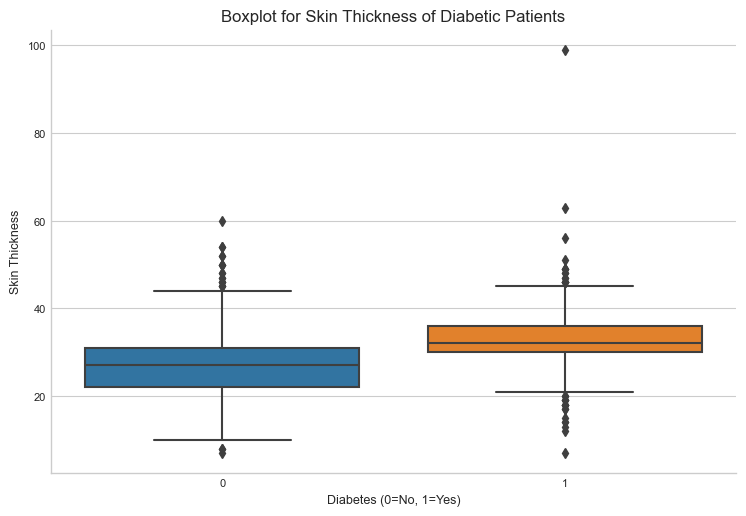

In [1189]:
sns.catplot(x='Outcome', y='SkinThickness', data=df3, kind='box', aspect=1.5)
plt.title("Boxplot for Skin Thickness of Diabetic Patients")
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel("Skin Thickness")
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'Pregnancies'),
  Text(1.5, 0, 'Glucose'),
  Text(2.5, 0, 'BloodPressure'),
  Text(3.5, 0, 'SkinThickness'),
  Text(4.5, 0, 'Insulin'),
  Text(5.5, 0, 'BMI'),
  Text(6.5, 0, 'PedigreeF'),
  Text(7.5, 0, 'Age'),
  Text(8.5, 0, 'Outcome')])

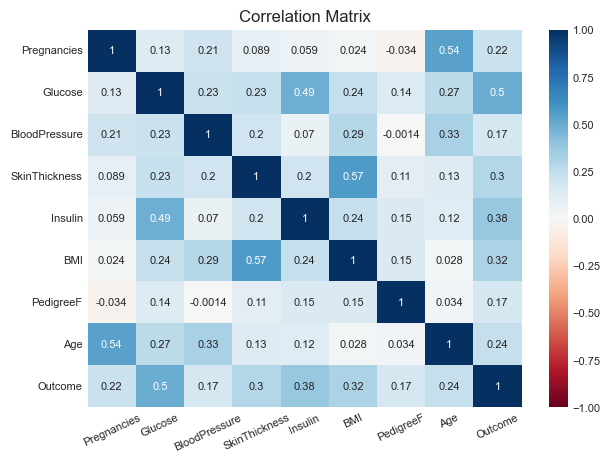

In [1313]:
plt.figure(figsize=(7,5))
s = sns.heatmap(df3.corr(), 
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
plt.title("Correlation Matrix")
plt.xticks(rotation=25)

### Modeling

In [1192]:
acc_list = []
prec_list = []
rec_list = []
spec_list = []
auc_list = []

acc_tuned_list = []
prec_tuned_list = []
rec_tuned_list = []
spec_tuned_list = []
auc_tuned_list = []

In [1193]:
# Function to evaluate un-tuned models and collect metrics into lists

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred); acc_list.append((accuracy*100).round(2))
    
    precision = precision_score(y_test, y_pred, average='macro'); prec_list.append((precision*100).round(2))
    recall = recall_score(y_test, y_pred, average='macro'); rec_list.append((recall*100).round(2)) # also known as Sensitivity
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp); spec_list.append((specificity*100).round(2))
    
    auc = roc_auc_score(y_test,y_pred); auc_list.append((auc*100).round(2))
    
    print(f'Accuracy: {(accuracy*100).round(2)} %')
    print(f'Precision: {(precision*100).round(2)} %')
    print(f'Recall: {(recall*100).round(2)} %')
    print(f'Specificity: {(specificity*100).round(2)} %')
    print(f'AUC score: {(auc*100).round(2)} %')
    
# macro computes the respective metric without considering the proportion of each label in the dataset

In [1194]:
# Function to evaluate tuned models and collect metrics into lists

def evaluate_tuned(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred); acc_tuned_list.append((accuracy*100).round(2))
    
    precision = precision_score(y_test, y_pred, average='macro'); prec_tuned_list.append((precision*100).round(2))
    recall = recall_score(y_test, y_pred, average='macro'); rec_tuned_list.append((recall*100).round(2)) # also known as Sensitivity
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp); spec_tuned_list.append((specificity*100).round(2))
    
    auc = roc_auc_score(y_test,y_pred); auc_tuned_list.append((auc*100).round(2))
    
    print(f'Accuracy: {(accuracy*100).round(2)} %')
    print(f'Precision: {(precision*100).round(2)} %')
    print(f'Recall: {(recall*100).round(2)} %')
    print(f'Specificity: {(specificity*100).round(2)} %')
    print(f'AUC score: {(auc*100).round(2)} %')
    
# macro computes the respective metric without considering the proportion of each label in the dataset

In [1195]:
# Function to plot learning curves for classification models

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def l_curve_clf(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator= model, X=features, 
                                                        y=labels, cv=None, n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')

    plt.xlabel('Training set size')
    plt.ylabel('Model Accuracy')
    plt.title('Learning curve')
    plt.legend(loc='best')
    plt.show()

### Preprocessing

In [1196]:
features = df3.drop(['Outcome'], axis=1)
labels = df3['Outcome']

In [1197]:
features

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    169.5  33.6   
1              1     85.0           66.0           29.0    102.5  26.6   
2              8    183.0           64.0           32.0    169.5  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    102.5  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           32.0    169.5  30.1   
767            1     93.0           70.0           31.0    102.5  30.4   

     PedigreeF  Age  
0        0.627   50  
1        0.351   31  
2        0.672   32  
3        0.167   21  
4        2.288   33  
..         ...  ...  
763      0.171   63  
764      0.340   27  
765      0.245   30  
766      0.349   47  
767      0.315   23  

[768 rows x 8 columns]

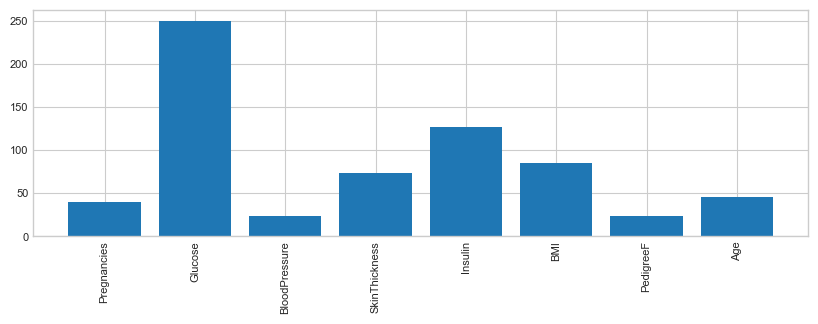

In [1198]:
# Feature Selection using SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

sel = SelectKBest(f_classif, k=8)
sel.fit(features, labels)
fe = sel.transform(features)

plt.figure(1 , figsize = (10 , 3))
plt.bar(features.columns, sel.scores_)
plt.xticks(rotation=90)
plt.show()

# Pregnancies, Glucose, Skin Thickness, Insulin, BMI, Age were the most important features

In [1199]:
features = df3.drop(['Outcome','PedigreeF','BloodPressure'], axis=1) # Choosing the 5 main variables

In [1200]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2,
                                                    random_state=1234)

In [1201]:
# Variable Scaling

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

#### Logistic Regression

In [1202]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=12)

logreg.fit(X_train_scaled, y_train)

evaluate(logreg, X_test_scaled, y_test)

Accuracy: 80.52 %
Precision: 80.51 %
Recall: 75.96 %
Specificity: 91.92 %
AUC score: 75.96 %


In [1203]:
# Hyperparameter Tuning

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = RandomizedSearchCV(
    estimator=logreg, param_distributions=grid, scoring='accuracy', cv=5, refit=True, random_state=2)

grid_search.fit(X_train_scaled, y_train)
opt_parameters =  grid_search.best_params_
logreg_tuned = LogisticRegression(**opt_parameters, random_state=1)

logreg_tuned.fit(X_train_scaled, y_train)

evaluate_tuned(logreg_tuned, X_test_scaled, y_test)

Accuracy: 81.17 %
Precision: 81.1 %
Recall: 76.87 %
Specificity: 91.92 %
AUC score: 76.87 %


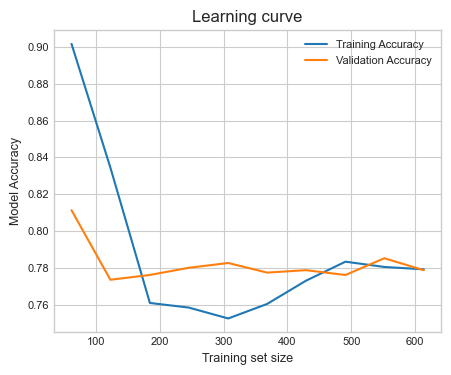

In [1204]:
l_curve_clf(logreg_tuned)

#### K-Nearest Neighbors

In [1205]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

evaluate(knn, X_test_scaled, y_test)

Accuracy: 81.17 %
Precision: 80.05 %
Recall: 78.08 %
Specificity: 88.89 %
AUC score: 78.08 %


In [1206]:
# Hyperparameter Tuning

n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

grid_search = RandomizedSearchCV(
    estimator=knn, param_distributions=grid, scoring='accuracy', cv=5, refit=True, random_state=2)

grid_search.fit(X_train_scaled, y_train)
opt_parameters =  grid_search.best_params_
knn_tuned = KNeighborsClassifier(**opt_parameters)

knn_tuned.fit(X_train_scaled, y_train)

evaluate_tuned(knn_tuned, X_test_scaled, y_test)

Accuracy: 87.01 %
Precision: 87.56 %
Recall: 83.84 %
Specificity: 94.95 %
AUC score: 83.84 %


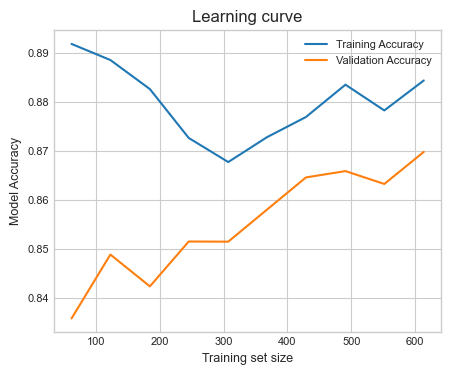

In [1207]:
l_curve_clf(knn_tuned)

#### Decision Tree

In [1208]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=1)

tree_clf.fit(X_train_scaled, y_train)

evaluate(tree_clf, X_test_scaled, y_test)

Accuracy: 86.36 %
Precision: 85.24 %
Recall: 84.95 %
Specificity: 89.9 %
AUC score: 84.95 %


In [1209]:
# Hyperparameter Tuning

grid = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}

grid_search = RandomizedSearchCV(
    estimator=tree_clf, param_distributions=grid, scoring='accuracy', cv=5, refit=True, random_state=2)

grid_search.fit(X_train_scaled, y_train)
opt_parameters =  grid_search.best_params_
tree_clf_tuned = DecisionTreeClassifier(**opt_parameters, random_state=1)

tree_clf_tuned.fit(X_train_scaled, y_train)

evaluate_tuned(tree_clf_tuned, X_test_scaled, y_test)

Accuracy: 88.96 %
Precision: 88.37 %
Recall: 87.37 %
Specificity: 92.93 %
AUC score: 87.37 %


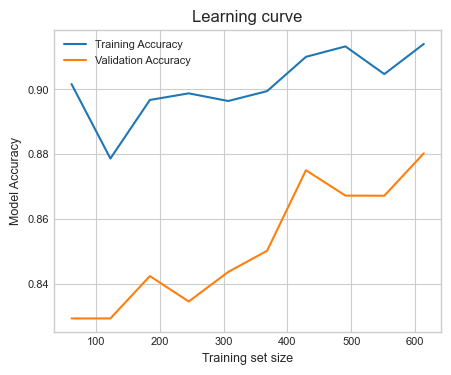

In [1210]:
l_curve_clf(tree_clf_tuned)

#### Random Forest

In [1211]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=1)

forest_clf.fit(X_train_scaled, y_train)

evaluate(forest_clf, X_test_scaled, y_test)

Accuracy: 90.91 %
Precision: 90.38 %
Recall: 89.7 %
Specificity: 93.94 %
AUC score: 89.7 %


In [1212]:
# Hyperparameter Tuning

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

grid_search = RandomizedSearchCV(
    estimator=forest_clf, param_distributions=param_grid, scoring='accuracy', cv=5, refit=True, random_state=2)

grid_search.fit(X_train_scaled, y_train)
opt_parameters =  grid_search.best_params_
forest_clf_tuned = RandomForestClassifier(**opt_parameters, random_state=1)

forest_clf_tuned.fit(X_train_scaled, y_train)

evaluate_tuned(forest_clf_tuned, X_test_scaled, y_test)

Accuracy: 90.91 %
Precision: 91.16 %
Recall: 88.89 %
Specificity: 95.96 %
AUC score: 88.89 %


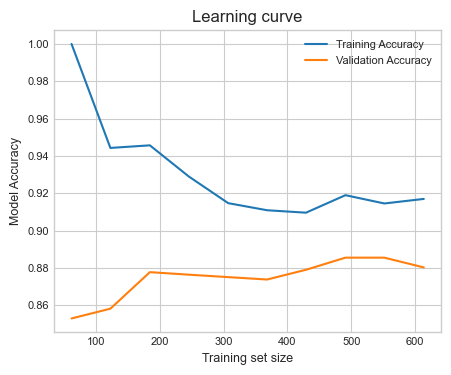

In [1213]:
l_curve_clf(forest_clf_tuned)

#### Naive Bayes Classifier

In [1214]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()

nb_clf.fit(X_train_scaled, y_train)

evaluate(nb_clf, X_test_scaled, y_test)

Accuracy: 77.92 %
Precision: 77.19 %
Recall: 73.13 %
Specificity: 89.9 %
AUC score: 73.13 %


In [1215]:
# Hyperparameter tuning

from sklearn.preprocessing import PowerTransformer

grid = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_search = RandomizedSearchCV(estimator=nb_classif, 
                     param_distributions=grid, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy', random_state = 2)

Data_transformed = PowerTransformer().fit_transform(X_train)

grid_search.fit(Data_transformed, y_train)
opt_parameters =  grid_search.best_params_
nb_clf_tuned = GaussianNB(**opt_parameters)

nb_clf_tuned.fit(Data_transformed, y_train)

evaluate_tuned(nb_clf_tuned, X_test_scaled, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 80.52 %
Precision: 80.08 %
Recall: 76.36 %
Specificity: 90.91 %
AUC score: 76.36 %


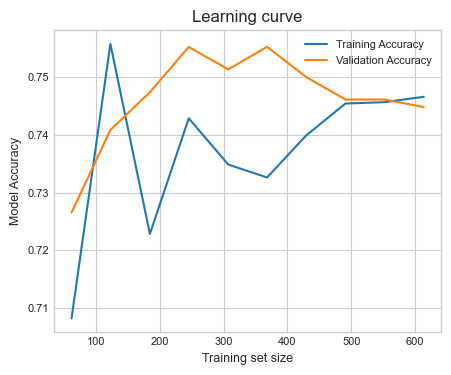

In [1216]:
l_curve_clf(nb_clf_tuned)

#### XGB Classifier

In [1217]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(random_state=1)

xgb_clf.fit(X_train_scaled, y_train)

evaluate(xgb_clf, X_test_scaled, y_test)

Accuracy: 88.96 %
Precision: 88.09 %
Recall: 87.78 %
Specificity: 91.92 %
AUC score: 87.78 %


In [1218]:
# Hyperparameter Tuning


grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

grid_search = RandomizedSearchCV(estimator=xgb_clf, 
                     param_distributions=grid, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy', random_state = 2)

grid_search.fit(X_train_scaled, y_train)
opt_parameters =  grid_search.best_params_
xgb_clf_tuned = xgb.XGBClassifier(**opt_parameters)

xgb_clf_tuned.fit(X_train_scaled, y_train)

evaluate_tuned(xgb_clf_tuned, X_test_scaled, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 90.26 %
Precision: 89.82 %
Recall: 88.79 %
Specificity: 93.94 %
AUC score: 88.79 %


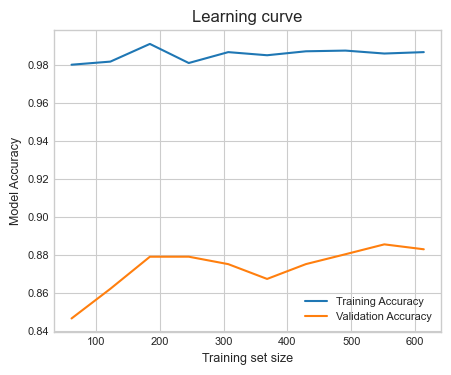

In [1219]:
l_curve_clf(xgb_clf_tuned)

## Evaluation Metrics

In [1220]:
model_names = ['LogReg', 'KNN', "Tree", 'Forest', "NaiveB", 'XGB']
data = {'Model': model_names,"Accuracy": acc_list, "Precision": prec_list, "Recall": rec_list, "Specificity": spec_list, 
        "AUC": auc_list}
eval_metrics = pd.DataFrame(data)
eval_metrics.set_index('Model', inplace=True)
eval_metrics # without tuning

Accuracy  Precision  Recall  Specificity    AUC
Model                                                  
LogReg     80.52      80.51   75.96        91.92  75.96
KNN        81.17      80.05   78.08        88.89  78.08
Tree       86.36      85.24   84.95        89.90  84.95
Forest     90.91      90.38   89.70        93.94  89.70
NaiveB     77.92      77.19   73.13        89.90  73.13
XGB        88.96      88.09   87.78        91.92  87.78

In [1221]:
model_names = ['LogReg', 'KNN', "Tree", 'Forest', "NaiveB", 'XGB']
data = {'Model': model_names,"Accuracy": acc_tuned_list, "Precision": prec_tuned_list, 
        "Recall": rec_tuned_list, "Specificity": spec_tuned_list, "AUC": auc_tuned_list}
eval_metrics = pd.DataFrame(data)
eval_metrics.set_index('Model', inplace=True)
eval_metrics # without tuning

Accuracy  Precision  Recall  Specificity    AUC
Model                                                  
LogReg     81.17      81.10   76.87        91.92  76.87
KNN        87.01      87.56   83.84        94.95  83.84
Tree       88.96      88.37   87.37        92.93  87.37
Forest     90.91      91.16   88.89        95.96  88.89
NaiveB     80.52      80.08   76.36        90.91  76.36
XGB        90.26      89.82   88.79        93.94  88.79

## Regression
    
#### Medical Cost Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

<u> Variables <u>

age,
sex,
bmi,
no. of children,
smoker,
region,
charges (cost of healthcare billed by insurance)
    


In [1222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [1223]:
df2 = pd.read_csv("Datasets/regression-insurance.csv")  # Importing the dataset
df2

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [1224]:
df2.info()  # Checking for null values and data types --> No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [1225]:
df2.duplicated().sum()

1

In [1226]:
df2.drop_duplicates(inplace=True)

In [1227]:
df2.describe()  # We can see that only charges has a skewed dataset with a mean much larger than median  

age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010

In [1228]:
# Univariate Analysis - checking if we have a biased or skewed dataset for the categorical variables

for i in ['sex', 'children', 'smoker', 'region']:
    print( "{}".format(df2[i].value_counts()))
    
    
# Conclusions: Data is biased towards non-smokers but is fairly balanced in terms of other variables like gender and region

male      675
female    662
Name: sex, dtype: int64
0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
no     1063
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'bmi'),
  Text(2.5, 0, 'children'),
  Text(3.5, 0, 'charges'),
  Text(4.5, 0, 'sex_male'),
  Text(5.5, 0, 'smoker_yes'),
  Text(6.5, 0, 'region_northwest'),
  Text(7.5, 0, 'region_southeast'),
  Text(8.5, 0, 'region_southwest')])

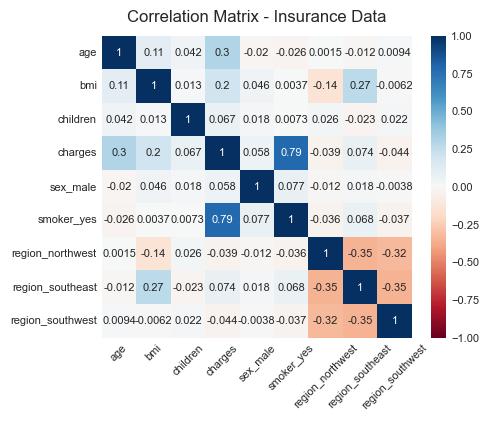

In [1314]:
# Categorical variables need to be converted to numerical for a complete correlation matrix

df2_dummies = pd.get_dummies(data=df2, drop_first=True)

s = sns.heatmap(df2_dummies.corr(), 
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
plt.title('Correlation Matrix - Insurance Data', pad=10)
plt.xticks(rotation=45) 

<Figure size 500x500 with 0 Axes>

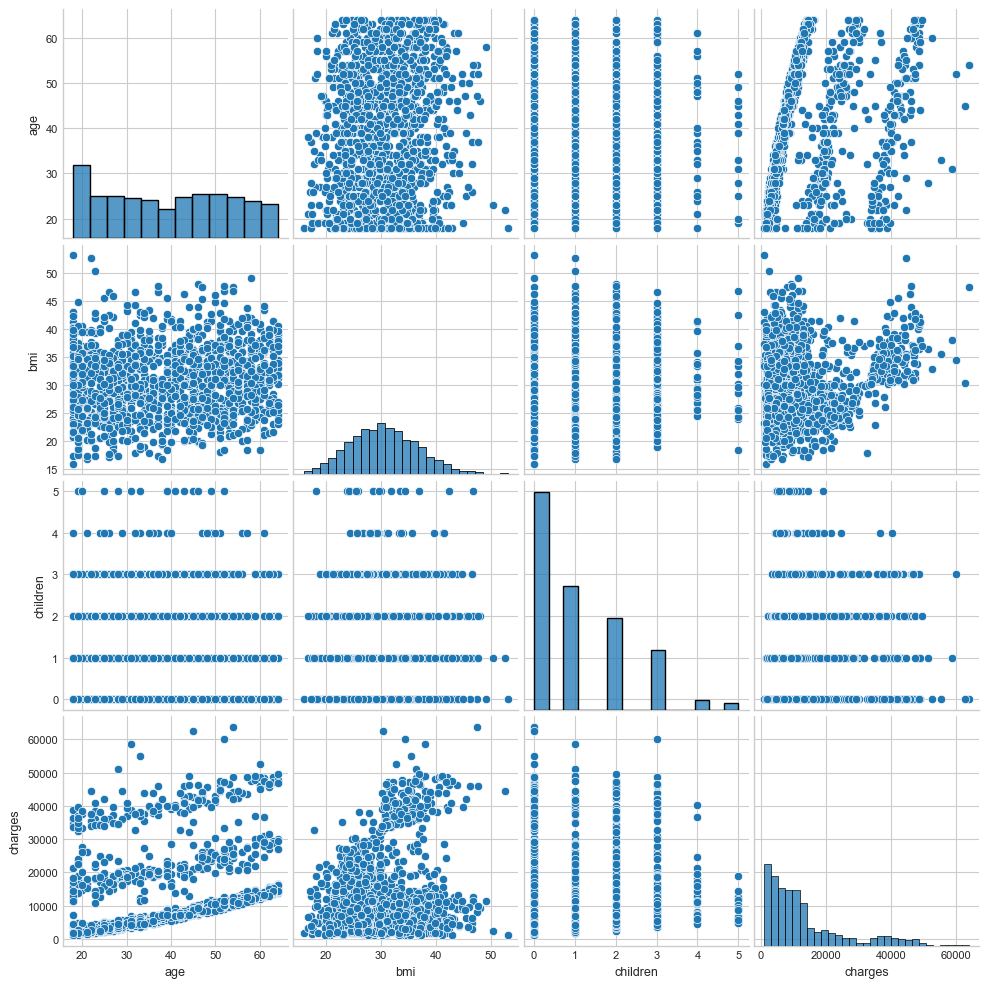

In [1316]:
plt.figure(figsize=(5,5))
sns.pairplot(df2) # This plots the numerical variables against numerical variables only

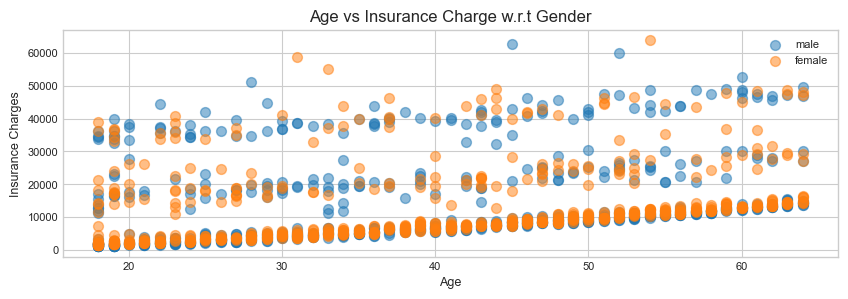

In [1231]:
# Looking at multivariate relationships

plt.figure(1 , figsize = (10 , 3))

for gender in ['male' , 'female']:
    plt.scatter(x = 'age' , y = 'charges' , data = df2[df2['sex'] == gender] ,
                s = 50 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Insurance Charges') 
plt.title('Age vs Insurance Charge w.r.t Gender')
plt.legend()
plt.show()

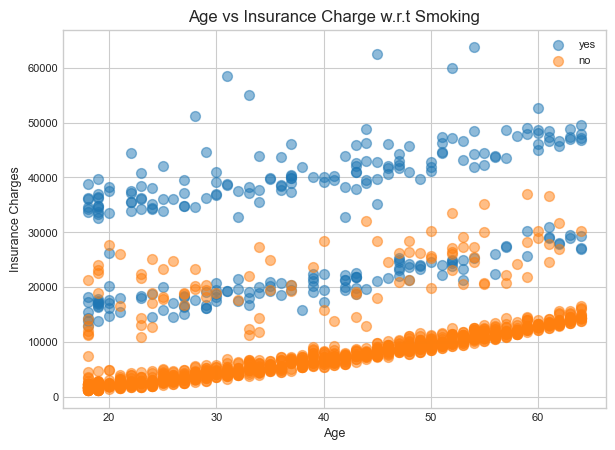

In [1232]:
plt.figure(1 , figsize = (7 , 5))

for smoker in ['yes' , 'no']:
    plt.scatter(x = 'age' , y = 'charges' , data = df2[df2['smoker'] == smoker] ,
                s = 50 , alpha = 0.5 , label = smoker)
plt.xlabel('Age'), plt.ylabel('Insurance Charges') 
plt.title('Age vs Insurance Charge w.r.t Smoking')
plt.legend()
plt.show()

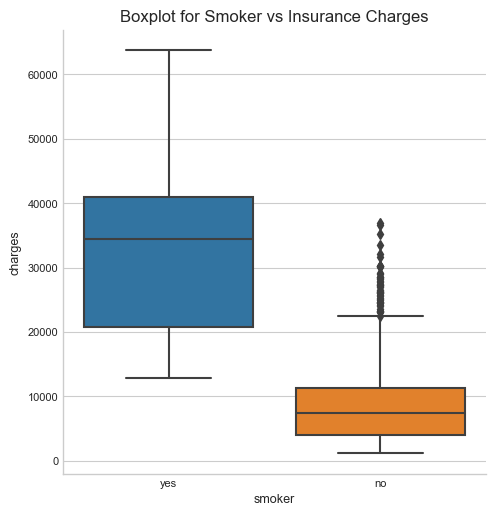

In [1233]:
sns.catplot(x='smoker', y='charges', data=df2, kind='box', aspect=1)
plt.title("Boxplot for Smoker vs Insurance Charges")
plt.show()

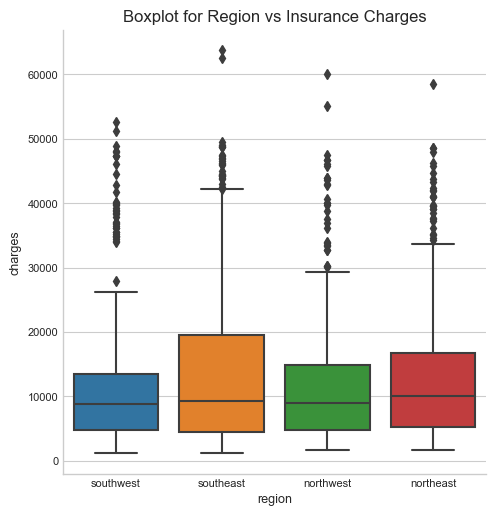

In [1234]:
sns.catplot(x='region', y='charges', data=df2, kind='box', aspect=1)
plt.title("Boxplot for Region vs Insurance Charges")
plt.show()

## Modeling

### Preprocessing

In [1235]:
features = df2.drop(["charges"], axis=1)
labels = df2["charges"]

In [1236]:
features

age     sex     bmi  children smoker     region
0      19  female  27.900         0    yes  southwest
1      18    male  33.770         1     no  southeast
2      28    male  33.000         3     no  southeast
3      33    male  22.705         0     no  northwest
4      32    male  28.880         0     no  northwest
...   ...     ...     ...       ...    ...        ...
1333   50    male  30.970         3     no  northwest
1334   18  female  31.920         0     no  northeast
1335   18  female  36.850         0     no  southeast
1336   21  female  25.800         0     no  southwest
1337   61  female  29.070         0    yes  northwest

[1337 rows x 6 columns]

In [1237]:
features = pd.get_dummies(data=features, drop_first=True)

features

age     bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.900         0         0           1                 0   
1      18  33.770         1         1           0                 0   
2      28  33.000         3         1           0                 0   
3      33  22.705         0         1           0                 1   
4      32  28.880         0         1           0                 1   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3         1           0                 1   
1334   18  31.920         0         0           0                 0   
1335   18  36.850         0         0           0                 0   
1336   21  25.800         0         0           0                 0   
1337   61  29.070         0         0           1                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                    1                 0  
3                    0                 0  
4                    0                 0  
...                ...               ...  
1333                 0                 0  
1334                 0                 0  
1335                 1                 0  
1336                 0                 1  
1337                 0                 0  

[1337 rows x 8 columns]

In [1238]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2,
                                                    random_state=12)

### Model-building

In [1239]:
from sklearn import metrics

In [1240]:
mae_tuned_list = []
rmse_tuned_list= []
r2_tuned_list= []

mae_list= []
rmse_list= []
r2_list= []

In [1241]:
# Function for K-Fold cross validation with K=5 folds without tuning

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt

def eval_(model):
    
    cv = KFold(n_splits=5, random_state=1, shuffle=True)

    scores1 = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
    scores2 = cross_val_score(model, X_train, y_train, scoring='r2',
                         cv=cv, n_jobs=-1)

    mae = mean(absolute(scores1))
    rmse = np.sqrt(mean(scores1**2))
    r2 = mean(scores2)

    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

    print("R-Squared: {}".format(r2.round(4))) #~1 is better
    print("MAE: {}".format(mae.round(4)))#lower the better
    print("RMSE: {}".format(rmse.round(4)))#lower the better

In [1242]:
# Function for K-Fold cross validation with K=5 folds with tuning

def eval_tuned(model):
    
    cv = KFold(n_splits=5, random_state=1, shuffle=True)

    scores1 = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
    scores2 = cross_val_score(model, X_train, y_train, scoring='r2',
                         cv=cv, n_jobs=-1)

    mae = mean(absolute(scores1))
    rmse = np.sqrt(mean(scores1**2))
    r2 = mean(scores2)

    mae_tuned_list.append(mae)
    rmse_tuned_list.append(rmse)
    r2_tuned_list.append(r2)
    
    model.fit(X_train, y_train) # Fit is called to obtain feature importances later

    print("R-Squared: {}".format(r2.round(4))) #~1 is better
    print("MAE: {}".format(mae.round(4)))#lower the better
    print("RMSE: {}".format(rmse.round(4)))#lower the better

In [1243]:
# Function to plot learning curves for regression models

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def l_curve(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator= model, X=features, 
                                                        y=labels, cv=None, n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='neg_mean_squared_error')
    train_scores_mean = np.mean(-train_scores, axis=1)
    test_scores_mean = np.mean(-test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label='Training error')
    plt.plot(train_sizes, test_scores_mean, label='Validation error')

    plt.xlabel('Training set size')
    plt.ylabel('MSE')
    plt.title('Learning curve')
    plt.legend(loc='best')
    plt.show()

#### 1. Linear Regression

In [1244]:
# Linear Regression using sklearn

from sklearn import linear_model

regr = linear_model.LinearRegression()

eval_(regr) # without tuning

R-Squared: 0.7419
MAE: 4061.17
RMSE: 4065.4688


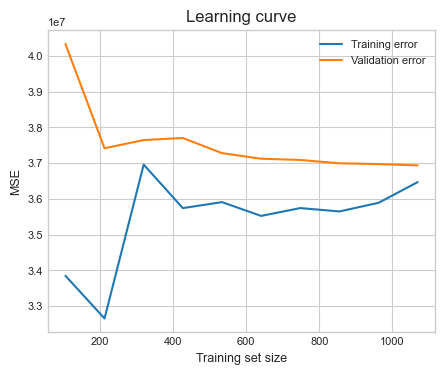

In [1245]:
# without tuning 

l_curve(regr)

In [1317]:
# Linear Regression using statsmodels API to obtain diagnostic plots to check if linear regression assumptions are satisfied

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn-whitegrid') # pretty matplotlib plots
plt.rc("figure", figsize=(5,4))
plt.rc('font', size=8)
plt.rc('figure', titlesize=12)
plt.rc('axes', labelsize=9)
plt.rc('axes', titlesize=12)

OLS_model = sm.OLS(labels, sm.add_constant(features))

OLSmodel = OLS_model.fit()

dataframe = df2

# model values
model_fitted_y = OLSmodel.fittedvalues
# model residuals
model_residuals = OLSmodel.resid
# normalized residuals
model_norm_residuals = OLSmodel.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = OLSmodel.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = OLSmodel.get_influence().cooks_distance[0]

C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


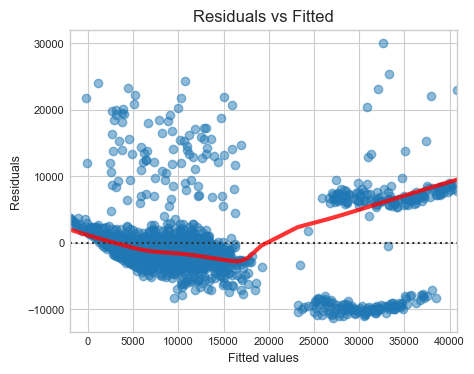

In [1318]:
# Residual Plot
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 3, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

C:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


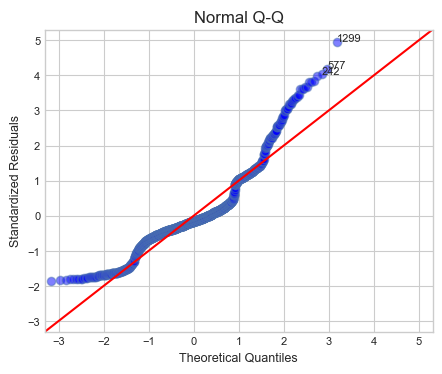

In [1319]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


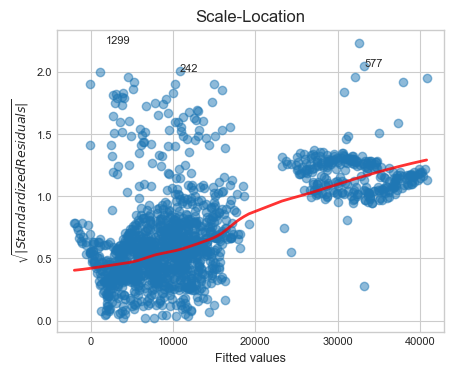

In [1320]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


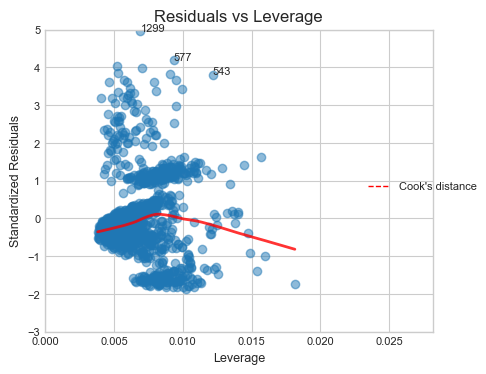

In [1321]:
def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.style.use('seaborn-whitegrid')
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
      plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));
p = len(OLSmodel.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50)) # 1 line
plot_lm_4.legend(loc='center right');

#### 2. Decision Tree

In [1251]:
from sklearn.tree import DecisionTreeRegressor

d_tree = DecisionTreeRegressor(random_state=1)

eval_(d_tree)

R-Squared: 0.6787
MAE: 3112.0728
RMSE: 3138.7944


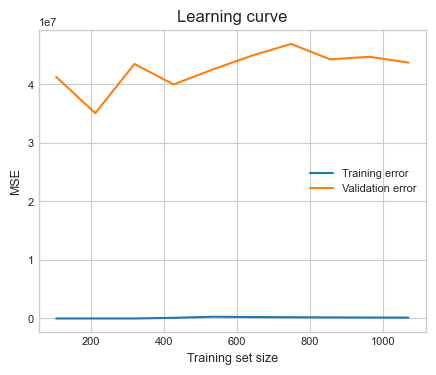

In [1322]:
l_curve(d_tree) # The errors don't converge - indicating overfitting of data

In [1253]:
# Tuning Decision Tree

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Creating the hyperparameter grid
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(d_tree, param_distributions=parameters, scoring='neg_mean_squared_error', cv=3, verbose=3)
 
tree_cv.fit(features, labels)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-137797497.958 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-133649130.391 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-135666603.740 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-137797497.958 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-133649130.391 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=None, max_leaf_nodes=70, min_samples_leaf

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  warnings.warn(some_fits_faile

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4,
                                                                     0.5, 0.6,
                                                                     0.7, 0.8,
                                                                     0.9

In [1254]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 5, 'max_leaf_nodes': 70, 'max_features': 'auto', 'max_depth': 7}
Best score is -46355669.56334295


In [1255]:
tree_tuned = DecisionTreeRegressor(splitter='best', min_weight_fraction_leaf=0.1, 
                                   min_samples_leaf=10, max_leaf_nodes=10, max_features=None, 
                                   max_depth=3)

# Using K-fold CV on tuned model
eval_tuned(tree_tuned) # We see an improvement in the R2 value

R-Squared: 0.7394
MAE: 3821.198
RMSE: 3871.0916


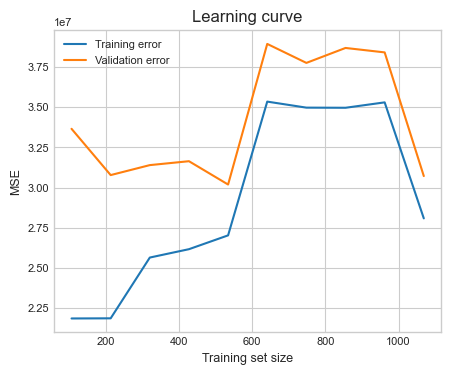

In [1256]:
# Confirming the fit by getting train and test errors

plt.rc("figure", figsize=(5,4), dpi=100)
l_curve(tree_tuned) 

# The errors converge and then decrease, so there is no over- or underfitting

#### 3. Random Forest

In [1257]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=1)

eval_(forest)

R-Squared: 0.8253
MAE: 2635.2506
RMSE: 2637.005


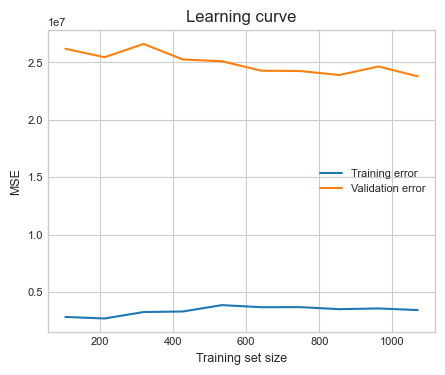

In [1258]:
l_curve(forest) # The errors don't converge, a sign of overfitting

In [1259]:
# Tuning the random forest regressor

grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

# Instantiating RandomizedSearchCV object
forest_cv = RandomizedSearchCV(forest, param_distributions=grid, 
                               scoring='neg_mean_squared_error', cv=3, verbose=3)

forest_cv.fit(features, labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END max_depth=3, max_features=sqrt, n_estimators=400, random_state=18;, score=-53668238.957 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=sqrt, n_estimators=400, random_state=18;, score=-53993104.297 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=sqrt, n_estimators=400, random_state=18;, score=-53073370.604 total time=   0.3s
[CV 1/3] END max_depth=4, max_features=sqrt, n_estimators=400, random_state=18;, score=-39165109.423 total time=   0.4s
[CV 2/3] END max_depth=4, max_features=sqrt, n_estimators=400, random_state=18;, score=-42944518.246 total time=   0.5s
[CV 3/3] END max_depth=4, max_features=sqrt, n_estimators=400, random_state=18;, score=-41114542.353 total time=   0.5s
[CV 1/3] END max_depth=6, max_features=log2, n_estimators=400, random_state=18;, score=-21571581.035 total time=   0.5s
[CV 2/3] END max_depth=6, max_features=log2, n_estimators=400, random_state=18;, score=-22547847.58

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [200, 300, 400, 500],
                                        'random_state': [18]},
                   scoring='neg_mean_squared_error', verbose=3)

In [1260]:
# Print the tuned parameters and score
print("Tuned Parameters: {}".format(forest_cv.best_params_))
print("Best score is {}".format(forest_cv.best_score_))

Tuned Parameters: {'random_state': 18, 'n_estimators': 200, 'max_features': 'log2', 'max_depth': 7}
Best score is -22452152.38978861


In [1261]:
forest_tuned = RandomForestRegressor(n_estimators = 400, random_state = 18,
                                     max_features = 'log2', max_depth = 7)

# Using K-fold CV on tuned model
eval_tuned(forest_tuned) # We see a slight improvement in the R2 value

R-Squared: 0.8452
MAE: 2763.8132
RMSE: 2764.4569


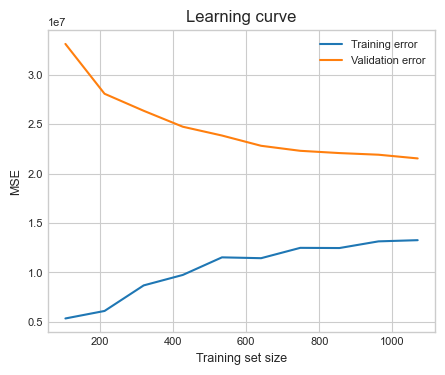

In [1262]:
plt.rc("figure", figsize=(5,4), dpi=100)
l_curve(forest_tuned) 
# There is greater convegence than without tuning - hence there is an improvement in model fit

#### 4. XG Boost/Light Boost/Cat Boost

In [1263]:
import xgboost

XGB = xgboost.XGBRegressor(random_state=1)

eval_(XGB)

R-Squared: 0.8018
MAE: 2996.1002
RMSE: 2998.7168


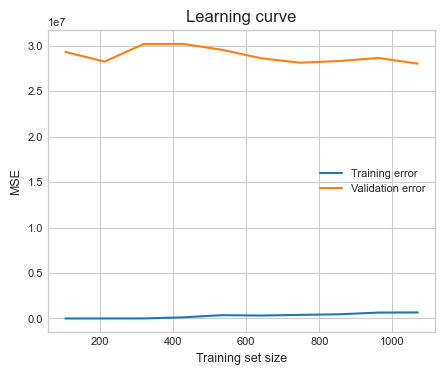

In [1264]:
l_curve(XGB)

In [1265]:
# Tuning the XGB regressor

param_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }


# Instantiating RandomizedSearchCV object
xgb_cv = RandomizedSearchCV(XGB, param_distributions=param_grid, 
                               scoring='neg_mean_squared_error', cv=3, verbose=3)

xgb_cv.fit(features, labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1;, score=-50922829.364 total time=   0.1s
[CV 2/3] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1;, score=-59232330.997 total time=   0.0s
[CV 3/3] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1;, score=-54180998.449 total time=   0.0s
[CV 1/3] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=1;, score=-43196245.023 total time=   0.0s
[CV 2/3] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=1;, score=-47685038.467 total time=   0.0s
[CV 3/3] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=1;, score=-48025039.584 total time=   0.0s
[CV 1/3] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=5;, score

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                      

In [1266]:
# Print the tuned parameters and score
print("Tuned Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

Tuned Parameters: {'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.5}
Best score is -24993498.804455142


In [1267]:
xgb_tuned = xgboost.XGBRegressor(random_state=1, min_child_weight=5, max_depth=4, learning_rate=0.15, 
                         gamma=0.1, colsample_bytree=0.7)

# Using K-fold CV on tuned model
eval_tuned(xgb_tuned) # We see a slight improvement in the R2 value

R-Squared: 0.8387
MAE: 2702.1123
RMSE: 2702.8397


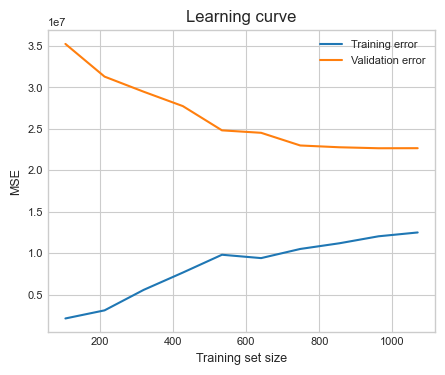

In [1268]:
plt.rc("figure", figsize=(5,4), dpi=100)
l_curve(xgb_tuned) 

### Light Boost

In [1269]:
import lightgbm

LGBM = lightgbm.LGBMRegressor(random_state=1)

eval_(LGBM)

R-Squared: 0.8291
MAE: 2773.8731
RMSE: 2777.6138


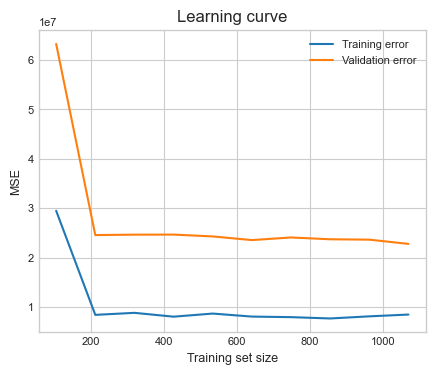

In [1270]:
l_curve(LGBM)

In [1271]:
# Tuning the LGBM regressor

params = {
            'n_estimators': [10, 50, 100, 500, 1000, 2000],
            'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
            'max_depth': range(1, 11),
            'num_leaves': range(2,22,2),
            'boosting_type': ['gbdt', 'dart', 'goss'],
        }


# Instantiating RandomizedSearchCV object
lgbm_cv = RandomizedSearchCV(LGBM, param_distributions=params, 
                               scoring='neg_mean_squared_error', cv=3, verbose=3)

lgbm_cv.fit(features, labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END boosting_type=dart, learning_rate=1.0, max_depth=10, n_estimators=10, num_leaves=18;, score=-26110907.417 total time=   0.0s
[CV 2/3] END boosting_type=dart, learning_rate=1.0, max_depth=10, n_estimators=10, num_leaves=18;, score=-27321294.418 total time=   0.0s
[CV 3/3] END boosting_type=dart, learning_rate=1.0, max_depth=10, n_estimators=10, num_leaves=18;, score=-28947089.038 total time=   0.0s
[CV 1/3] END boosting_type=dart, learning_rate=0.1, max_depth=8, n_estimators=1000, num_leaves=6;, score=-19825379.180 total time=   1.6s
[CV 2/3] END boosting_type=dart, learning_rate=0.1, max_depth=8, n_estimators=1000, num_leaves=6;, score=-20368055.547 total time=   3.7s
[CV 3/3] END boosting_type=dart, learning_rate=0.1, max_depth=8, n_estimators=1000, num_leaves=6;, score=-24210483.703 total time=   0.8s
[CV 1/3] END boosting_type=gbdt, learning_rate=0.001, max_depth=9, n_estimators=10, num_leaves=8;, score=-14675

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(random_state=1),
                   param_distributions={'boosting_type': ['gbdt', 'dart',
                                                          'goss'],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1.0],
                                        'max_depth': range(1, 11),
                                        'n_estimators': [10, 50, 100, 500, 1000,
                                                         2000],
                                        'num_leaves': range(2, 22, 2)},
                   scoring='neg_mean_squared_error', verbose=3)

In [1272]:
# Print the tuned parameters and score
print("Tuned Parameters: {}".format(lgbm_cv.best_params_))
print("Best score is {}".format(lgbm_cv.best_score_))

Tuned Parameters: {'num_leaves': 4, 'n_estimators': 500, 'max_depth': 2, 'learning_rate': 0.1, 'boosting_type': 'dart'}
Best score is -20466213.93269928


In [1273]:
lgbm_tuned = lightgbm.LGBMRegressor(num_leaves= 10, n_estimators= 100, max_depth= 3, 
                                    learning_rate= 0.1, boosting_type= 'gbdt')

# Using K-fold CV on tuned model

eval_tuned(lgbm_tuned) # We see an imporvement in model fit

R-Squared: 0.8513
MAE: 2425.2343
RMSE: 2425.5283


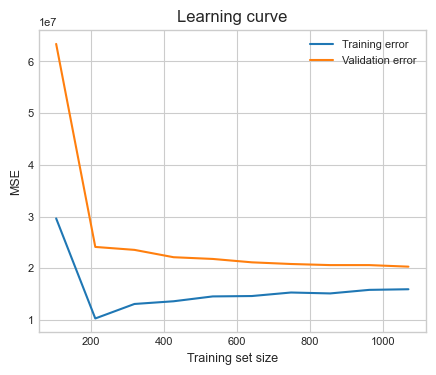

In [1274]:
l_curve(lgbm_tuned)

### CAT boost

In [1275]:
import catboost

CAT = catboost.CatBoostRegressor(verbose=0, random_state=1)

eval_(CAT)

R-Squared: 0.8358
MAE: 2597.4687
RMSE: 2597.6543


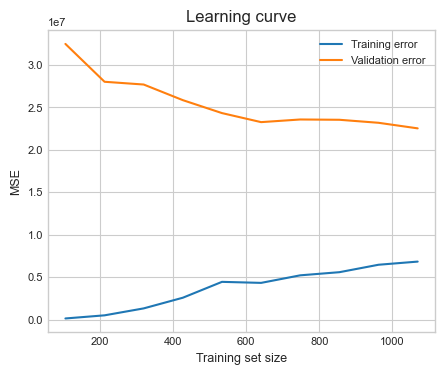

In [1276]:
l_curve(CAT)

In [1277]:
# Tuning the CATBoost regressor

params = {'random_strength': range(0,10),
        'learning_rate': [0.0001, 0.001, 0.01],
        'depth': range(2,11),
        'l2_leaf_reg': range(4,11)}


# Instantiating RandomizedSearchCV object
cat_cv = RandomizedSearchCV(CAT, param_distributions=params, 
                               scoring='neg_mean_squared_error', cv=3, verbose=3)

cat_cv.fit(features, labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END depth=6, l2_leaf_reg=9, learning_rate=0.0001, random_strength=7;, score=-133894093.314 total time=   1.8s
[CV 2/3] END depth=6, l2_leaf_reg=9, learning_rate=0.0001, random_strength=7;, score=-128586152.598 total time=   4.2s
[CV 3/3] END depth=6, l2_leaf_reg=9, learning_rate=0.0001, random_strength=7;, score=-132516734.984 total time=   1.2s
[CV 1/3] END depth=8, l2_leaf_reg=7, learning_rate=0.0001, random_strength=9;, score=-134315079.859 total time=   2.1s
[CV 2/3] END depth=8, l2_leaf_reg=7, learning_rate=0.0001, random_strength=9;, score=-128925872.831 total time=   2.1s
[CV 3/3] END depth=8, l2_leaf_reg=7, learning_rate=0.0001, random_strength=9;, score=-132900718.361 total time=   2.2s
[CV 1/3] END depth=8, l2_leaf_reg=4, learning_rate=0.001, random_strength=8;, score=-55470489.321 total time=   2.1s
[CV 2/3] END depth=8, l2_leaf_reg=4, learning_rate=0.001, random_strength=8;, score=-54861410.029 total time

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostRegressor object at 0x00000175461CE2E0>,
                   param_distributions={'depth': range(2, 11),
                                        'l2_leaf_reg': range(4, 11),
                                        'learning_rate': [0.0001, 0.001, 0.01],
                                        'random_strength': range(0, 10)},
                   scoring='neg_mean_squared_error', verbose=3)

In [1278]:
# Print the tuned parameters and score
print("Tuned Parameters: {}".format(cat_cv.best_params_))
print("Best score is {}".format(cat_cv.best_score_))

Tuned Parameters: {'random_strength': 9, 'learning_rate': 0.01, 'l2_leaf_reg': 9, 'depth': 3}
Best score is -21092339.04300798


In [1279]:
cat_tuned = catboost.CatBoostRegressor(learning_rate= 0.01, random_strength= 6, depth= 6, l2_leaf_reg= 9)


# Using K-fold CV on tuned model
eval_tuned(cat_tuned) # We see an improvement in the R2 value

0:	learn: 11673.3596728	total: 1.27ms	remaining: 1.27s
1:	learn: 11599.8526583	total: 2.45ms	remaining: 1.22s
2:	learn: 11535.7548441	total: 3.94ms	remaining: 1.31s
3:	learn: 11470.5717702	total: 4.73ms	remaining: 1.18s
4:	learn: 11399.7849007	total: 6.11ms	remaining: 1.22s
5:	learn: 11341.2737762	total: 7.5ms	remaining: 1.24s
6:	learn: 11267.9930679	total: 8.87ms	remaining: 1.26s
7:	learn: 11203.4293331	total: 10.2ms	remaining: 1.26s
8:	learn: 11128.2561080	total: 11.3ms	remaining: 1.25s
9:	learn: 11059.4187170	total: 12.7ms	remaining: 1.25s
10:	learn: 10997.8742748	total: 14ms	remaining: 1.26s
11:	learn: 10940.0451901	total: 15.4ms	remaining: 1.26s
12:	learn: 10883.6021326	total: 16.4ms	remaining: 1.24s
13:	learn: 10829.4102001	total: 17.7ms	remaining: 1.25s
14:	learn: 10767.0610064	total: 19.1ms	remaining: 1.25s
15:	learn: 10707.4107405	total: 19.7ms	remaining: 1.21s
16:	learn: 10647.5078321	total: 21ms	remaining: 1.22s
17:	learn: 10594.7945568	total: 22.3ms	remaining: 1.22s
18:	lea

244:	learn: 4999.1001547	total: 331ms	remaining: 1.02s
245:	learn: 4997.9142203	total: 332ms	remaining: 1.02s
246:	learn: 4995.3307358	total: 334ms	remaining: 1.02s
247:	learn: 4987.3770243	total: 335ms	remaining: 1.02s
248:	learn: 4978.2285166	total: 337ms	remaining: 1.01s
249:	learn: 4972.0977097	total: 338ms	remaining: 1.01s
250:	learn: 4965.9919720	total: 340ms	remaining: 1.01s
251:	learn: 4956.8581552	total: 341ms	remaining: 1.01s
252:	learn: 4948.9607266	total: 343ms	remaining: 1.01s
253:	learn: 4944.7497816	total: 343ms	remaining: 1.01s
254:	learn: 4942.2760196	total: 345ms	remaining: 1.01s
255:	learn: 4935.4470318	total: 346ms	remaining: 1.01s
256:	learn: 4926.3917131	total: 354ms	remaining: 1.02s
257:	learn: 4918.4552263	total: 356ms	remaining: 1.02s
258:	learn: 4913.3118581	total: 358ms	remaining: 1.02s
259:	learn: 4910.7368995	total: 359ms	remaining: 1.02s
260:	learn: 4905.0666758	total: 360ms	remaining: 1.02s
261:	learn: 4897.4649133	total: 362ms	remaining: 1.02s
262:	learn

468:	learn: 4321.1934679	total: 667ms	remaining: 756ms
469:	learn: 4320.6484799	total: 669ms	remaining: 754ms
470:	learn: 4319.7693793	total: 671ms	remaining: 753ms
471:	learn: 4318.3173661	total: 672ms	remaining: 752ms
472:	learn: 4317.2816637	total: 673ms	remaining: 750ms
473:	learn: 4315.0980875	total: 674ms	remaining: 748ms
474:	learn: 4313.2561585	total: 676ms	remaining: 747ms
475:	learn: 4310.9800297	total: 677ms	remaining: 746ms
476:	learn: 4309.1384899	total: 679ms	remaining: 744ms
477:	learn: 4307.5869058	total: 680ms	remaining: 743ms
478:	learn: 4307.2552824	total: 681ms	remaining: 741ms
479:	learn: 4305.6936445	total: 682ms	remaining: 739ms
480:	learn: 4304.3170987	total: 684ms	remaining: 738ms
481:	learn: 4302.8205899	total: 685ms	remaining: 737ms
482:	learn: 4300.9507648	total: 687ms	remaining: 735ms
483:	learn: 4299.1111220	total: 688ms	remaining: 734ms
484:	learn: 4298.6381463	total: 690ms	remaining: 732ms
485:	learn: 4297.6564043	total: 691ms	remaining: 731ms
486:	learn

700:	learn: 4144.6680317	total: 1s	remaining: 428ms
701:	learn: 4143.5526546	total: 1s	remaining: 427ms
702:	learn: 4143.0599842	total: 1.01s	remaining: 426ms
703:	learn: 4142.0970054	total: 1.01s	remaining: 424ms
704:	learn: 4141.4083883	total: 1.01s	remaining: 423ms
705:	learn: 4141.1445091	total: 1.01s	remaining: 422ms
706:	learn: 4140.7975959	total: 1.01s	remaining: 420ms
707:	learn: 4140.2268446	total: 1.01s	remaining: 419ms
708:	learn: 4139.8717497	total: 1.02s	remaining: 418ms
709:	learn: 4139.0921791	total: 1.02s	remaining: 416ms
710:	learn: 4138.9186790	total: 1.02s	remaining: 415ms
711:	learn: 4137.3550125	total: 1.02s	remaining: 413ms
712:	learn: 4137.1549941	total: 1.02s	remaining: 412ms
713:	learn: 4136.4210034	total: 1.02s	remaining: 410ms
714:	learn: 4135.6679103	total: 1.03s	remaining: 409ms
715:	learn: 4135.0097343	total: 1.03s	remaining: 408ms
716:	learn: 4134.6827650	total: 1.03s	remaining: 406ms
717:	learn: 4134.3123001	total: 1.03s	remaining: 405ms
718:	learn: 4134

928:	learn: 4013.9893737	total: 1.34s	remaining: 102ms
929:	learn: 4013.2349124	total: 1.34s	remaining: 101ms
930:	learn: 4012.5629301	total: 1.34s	remaining: 99.6ms
931:	learn: 4012.3792727	total: 1.34s	remaining: 98.1ms
932:	learn: 4011.5802997	total: 1.35s	remaining: 96.7ms
933:	learn: 4011.1409960	total: 1.35s	remaining: 95.3ms
934:	learn: 4010.3452464	total: 1.35s	remaining: 93.8ms
935:	learn: 4010.0007108	total: 1.35s	remaining: 92.4ms
936:	learn: 4009.2818065	total: 1.35s	remaining: 90.9ms
937:	learn: 4008.6026635	total: 1.35s	remaining: 89.5ms
938:	learn: 4008.2991580	total: 1.35s	remaining: 88ms
939:	learn: 4007.7041803	total: 1.36s	remaining: 86.6ms
940:	learn: 4007.3943946	total: 1.36s	remaining: 85.1ms
941:	learn: 4006.3853965	total: 1.36s	remaining: 83.7ms
942:	learn: 4005.6737122	total: 1.36s	remaining: 82.2ms
943:	learn: 4004.9047124	total: 1.36s	remaining: 80.8ms
944:	learn: 4004.1971550	total: 1.36s	remaining: 79.4ms
945:	learn: 4003.6403030	total: 1.36s	remaining: 77.

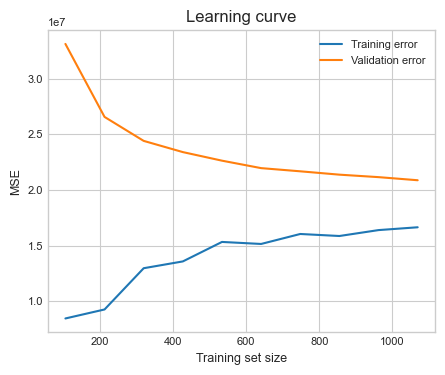

In [1280]:
l_curve(cat_tuned)

### Model Evaluation

### Evaluation Summary and Feature Importances

In [1281]:
model_names

['LogReg', 'KNN', 'Tree', 'Forest', 'NaiveB', 'XGB']

In [1282]:
mae_list = list(np.around(np.array(mae_list),2))
rmse_list = list(np.around(np.array(rmse_list),2))
r2_list = list(np.around(np.array(r2_list),2))
mae_tuned_list = list(np.around(np.array(mae_tuned_list),2))
rmse_tuned_list = list(np.around(np.array(rmse_tuned_list),2))
r2_tuned_list = list(np.around(np.array(r2_tuned_list),2))

In [1283]:
data = {'Model': model_names,"MAE": mae_list, "RMSE": rmse_list, "R-Squared": r2_list}
eval_metrics = pd.DataFrame(data)
eval_metrics # without tuning

Model      MAE     RMSE  R-Squared
0  LogReg  4061.17  4065.47       0.74
1     KNN  3112.07  3138.79       0.68
2    Tree  2635.25  2637.00       0.83
3  Forest  2996.10  2998.72       0.80
4  NaiveB  2773.87  2777.61       0.83
5     XGB  2597.47  2597.65       0.84

In [1284]:
models = ['d_tree', 'forest', 'XGB', 'LGBM', 'CAT']

data = {'Model': model_names_tuned,"MAE": mae_tuned_list, "RMSE": rmse_tuned_list, "R-Squared": r2_tuned_list}
eval_metrics_tuned = pd.DataFrame(data)
eval_metrics_tuned # tuned

Model      MAE     RMSE  R-Squared
0  d_tree  3821.20  3871.09       0.74
1  forest  2763.81  2764.46       0.85
2     XGB  2702.11  2702.84       0.84
3    LGBM  2425.23  2425.53       0.85
4     CAT  2553.05  2553.52       0.85

In [1285]:
# Which features were the most important when making predictions using each model? 

data = {'Features': list(features.columns), "Tree": list(tree_tuned.feature_importances_), 
        "Forest": list(forest_tuned.feature_importances_), "XGB": list(xgb_tuned.feature_importances_),
        "LGBM": list(lgbm_tuned.feature_importances_), "CATB": list(cat_tuned.get_feature_importance())}

f_importances = pd.DataFrame(data)
f_importances.set_index("Features", inplace=True)
f_importances

Tree    Forest       XGB  LGBM       CATB
Features                                                       
age               0.116019  0.140870  0.029847   194   9.878871
bmi               0.000000  0.150080  0.032989   254  10.698275
children          0.008046  0.020089  0.007981    62   1.873804
sex_male          0.000000  0.006804  0.004872    19   0.360421
smoker_yes        0.875935  0.667124  0.908498    48  75.814950
region_northwest  0.000000  0.004844  0.005169     8   0.530783
region_southeast  0.000000  0.006261  0.006061    21   0.408439
region_southwest  0.000000  0.003929  0.004585    16   0.434458

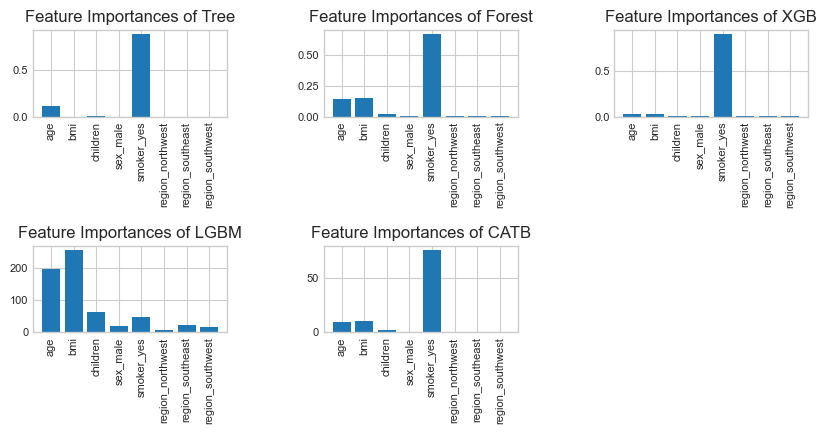

In [1286]:
plt.figure(1 , figsize = (10 , 4))

models = ["Tree", "Forest", "XGB", "LGBM", "CATB"]

n = 0 
for x in models:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace =1.5 , wspace = 0.5)
    plt.bar(features.columns, f_importances[x])
    plt.xticks(rotation=90)
    plt.title('Feature Importances of {}'.format(x))
plt.show()

## <u> Unsupervised Learning <u>

#### Customer Segmentation Dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
    
<u> Variables <u>

**CustomerID:** Unique ID assigned to the customer

**Gender:** Gender of the customer

**Age:** Age of the customer

**Annual Income (k$):** Annual Income of the customer

**Spending Score (1-100):** Score assigned by the mall based on customer behavior and spending nature

In [1287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [1288]:
df1 = pd.read_csv("Datasets/unsupervised-Mall_Customers.csv")  # Importing the dataset
df1

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [1289]:
df1.isnull().sum()  # Checking for null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [1290]:
df1.describe()

# Since the mean is similar to the median in all variables, the data is not skewed and 
# hence pre=processing does not require feature scaling.

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

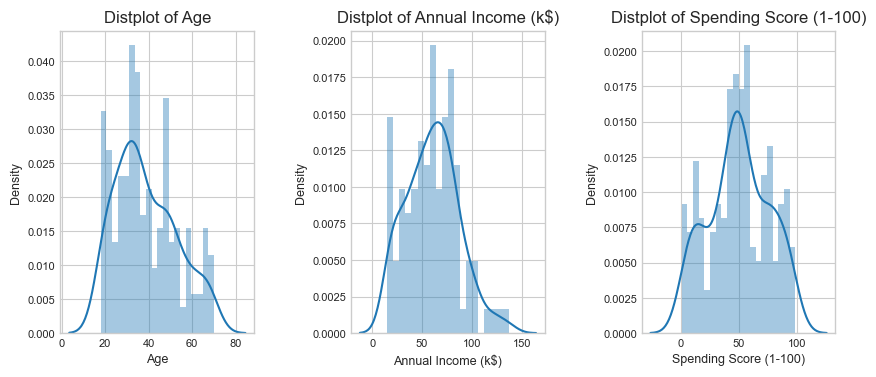

In [1291]:
# Loking at individual variable distributions

plt.figure(1 , figsize = (10 , 4))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df1[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

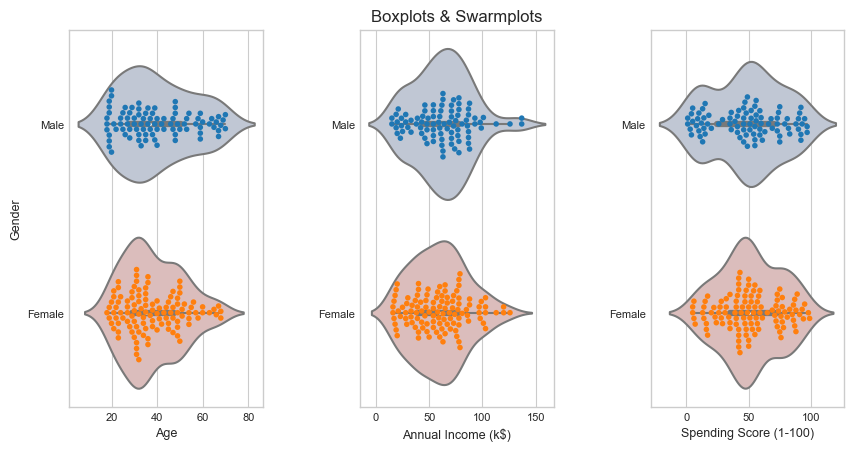

In [1292]:
# Distribution of Age, Income and Spending score by gender

plt.figure(1 , figsize = (10 , 5))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 1 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df1 , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df1, size = 4)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

# Although we don't see much of a difference in the variables when considered separately for 
# each gender.

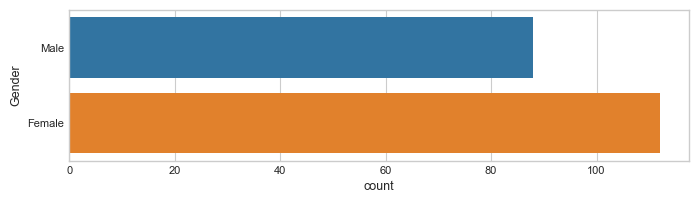

In [1293]:
plt.figure(1 , figsize = (8,2))
sns.countplot(y = 'Gender' , data = df1)
plt.show()

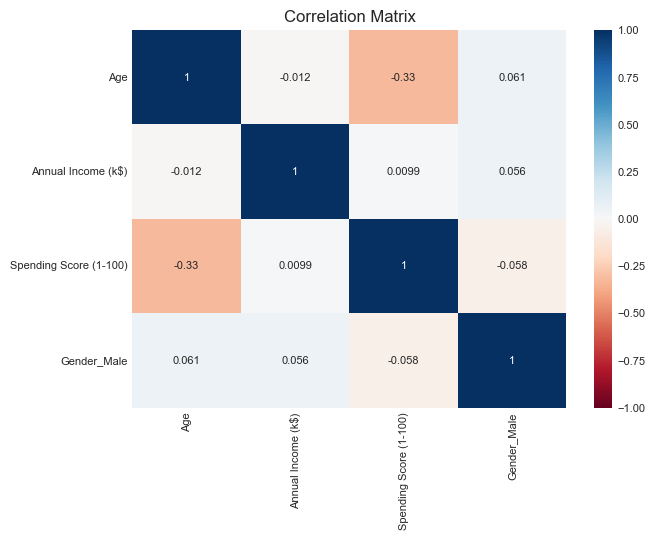

In [1294]:
# Looking at the pairwise correlations using a heatmap

df1_dummies = pd.get_dummies(data=df1, drop_first=True)

plt.figure(figsize=(7, 5))
s = sns.heatmap(df1_dummies.drop('CustomerID', axis=1).corr(),  #Removing customer ID
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix heatmap shows that there is a moderate negative correlation between age and spending score of customers - we will use a scatter plot to confirm this further.

Text(0.5, 1.0, 'Age vs Spending Score')

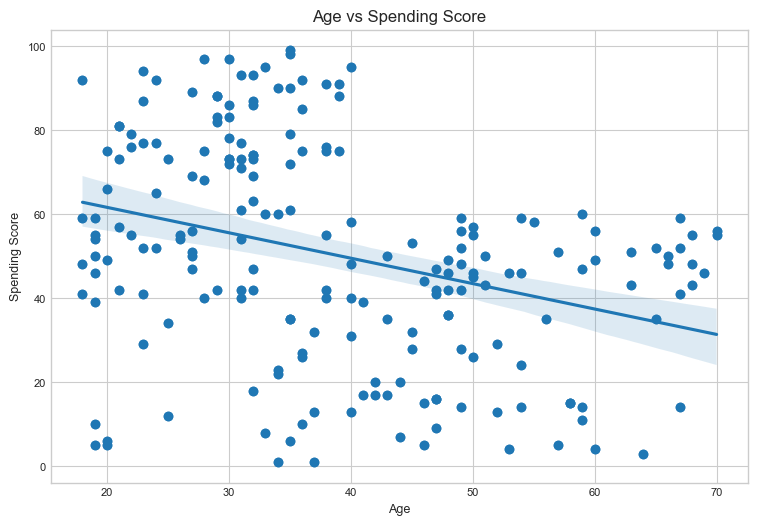

In [1323]:
plt.figure(figsize=(9, 6))

plt.scatter(df1['Age'], df1['Spending Score (1-100)'])
sns.regplot(x = df1['Age'] , y = df1['Spending Score (1-100)'] , data = df1)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title("Age vs Spending Score")

This confirms our observation - hence we can conclude that there is a negative relationship between Age and Spending score.

### Modelling

In [1296]:
df1.drop(['CustomerID'], axis=1, inplace=True)

In [1297]:
# Converting categorical to numerical variables

df1 = pd.get_dummies(df1, columns = ['Gender'])
df1.rename(columns = {"Gender_Female": "Females", "Gender_Male": "Males"}, inplace=True)
df1

Age  Annual Income (k$)  Spending Score (1-100)  Females  Males
0     19                  15                      39        0      1
1     21                  15                      81        0      1
2     20                  16                       6        1      0
3     23                  16                      77        1      0
4     31                  17                      40        1      0
..   ...                 ...                     ...      ...    ...
195   35                 120                      79        1      0
196   45                 126                      28        1      0
197   32                 126                      74        0      1
198   32                 137                      18        0      1
199   30                 137                      83        0      1

[200 rows x 5 columns]

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


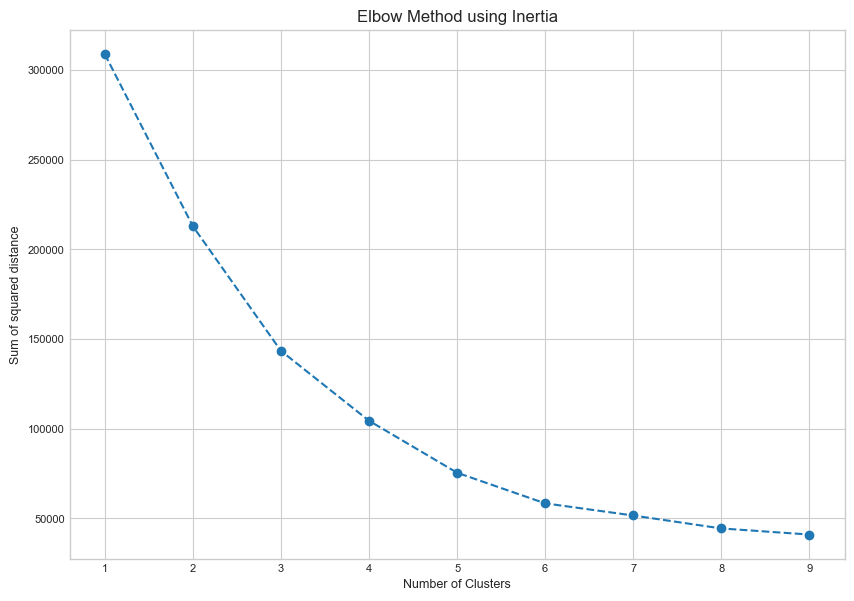

In [1324]:
# Using Elbow method to obtain the optimum number of clusters to use in K-Means clustering

results = {}

for i in range (1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df1)
    results[i] = kmeans.inertia_
    
plt.figure(figsize=(10, 7))
plt.plot(results.keys(), results.values(), marker='o', linestyle='--')
plt.title('Elbow Method using Inertia') # Inertia is the sum of the within-cluster squared distances
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

In [1299]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(df1)

KMeans(n_clusters=4, random_state=42)

In [1300]:
df1_kmeans = df1.copy()
df1_kmeans['Segment'] = kmeans.labels_
df1_kmeans

Age  Annual Income (k$)  Spending Score (1-100)  Females  Males  Segment
0     19                  15                      39        0      1        2
1     21                  15                      81        0      1        2
2     20                  16                       6        1      0        1
3     23                  16                      77        1      0        2
4     31                  17                      40        1      0        1
..   ...                 ...                     ...      ...    ...      ...
195   35                 120                      79        1      0        3
196   45                 126                      28        1      0        0
197   32                 126                      74        0      1        3
198   32                 137                      18        0      1        0
199   30                 137                      83        0      1        3

[200 rows x 6 columns]

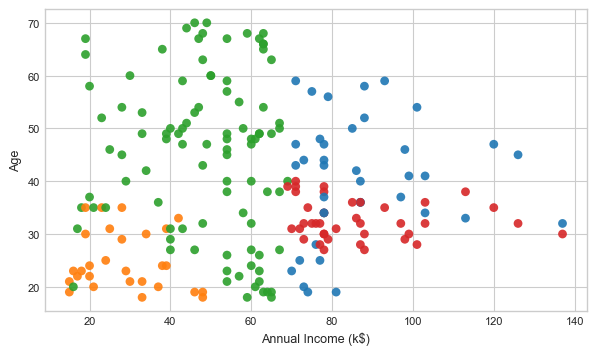

In [1301]:
# Generating two-variable plots to get clear clusters 

plt.figure(figsize=(7,4))

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(df1)
df1_kmeans = df1.copy()
df1_kmeans['Segment'] = kmeans.labels_
    
sns.scatterplot(
        x=df1_kmeans['Annual Income (k$)'],
        y=df1_kmeans['Age'],
        hue=df1_kmeans['Segment'], legend=False, s=40,
        linewidth=0, alpha=0.9, palette=['tab:blue', 'tab:green', 
                                         'tab:orange', 'tab:red'])
plt.show()

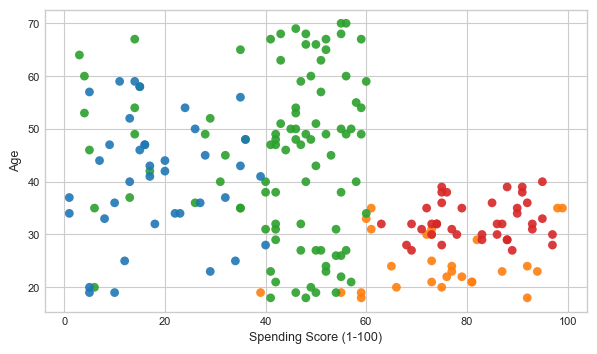

In [1302]:
plt.figure(figsize=(7,4))

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(df1)
df1_kmeans = df1.copy()
df1_kmeans['Segment'] = kmeans.labels_
    
sns.scatterplot(
        x=df1_kmeans['Spending Score (1-100)'],
        y=df1_kmeans['Age'],
        hue=df1_kmeans['Segment'], legend=False, s=40,
        linewidth=0, alpha=0.9, palette=['tab:blue', 'tab:green', 
                                         'tab:orange', 'tab:red'])
plt.show()

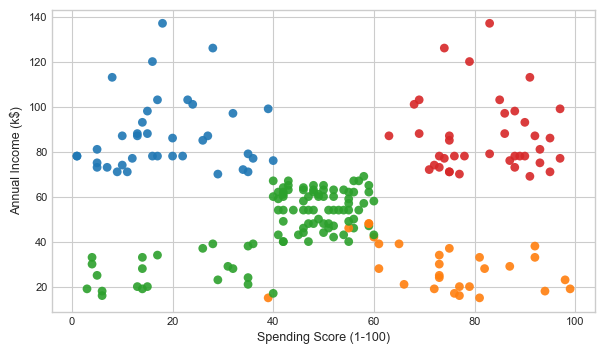

In [1303]:
plt.figure(figsize=(7,4))

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(df1)
df1_kmeans = df1.copy()
df1_kmeans['Segment'] = kmeans.labels_
    
sns.scatterplot(
        x=df1_kmeans['Spending Score (1-100)'],
        y=df1_kmeans['Annual Income (k$)'],
        hue=df1_kmeans['Segment'], legend=False, s=40,
        linewidth=0, alpha=0.9, palette=['tab:blue', 'tab:green', 
                                         'tab:orange', 'tab:red'])
plt.show()

Clear clusters were visible when plotting Income vs Spending Score - hence similar plots were drawn for other values of K to get the optimal separation.

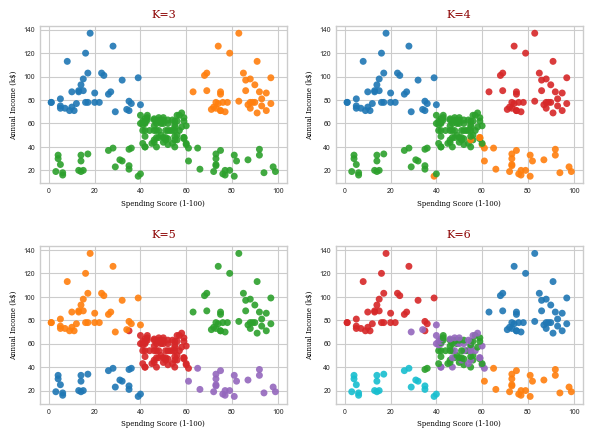

In [1325]:
# Plotting for K=3,4,5,6 clusters

plt.figure(figsize=(7, 5))

font = {'family': 'serif','color':  'darkred','weight': 'normal','size': 8,}

font2 = {'family': 'serif','color':  'black','weight': 'normal','size': 5,}

n = 0 
for x in range(3,7):
    n += 1
    plt.subplot(2 , 2 , n)
    
    kmeans = KMeans(n_clusters=x, init='k-means++', random_state=42)
    kmeans.fit(df1)
    df1_kmeans = df1.copy()
    df1_kmeans['Segment'] = kmeans.labels_
    
    if x==6:
        sns.scatterplot(
        x=df1_kmeans['Spending Score (1-100)'],
        y=df1_kmeans['Annual Income (k$)'],
        hue=df1_kmeans['Segment'], legend=False, s=25,
        linewidth=0, alpha=0.9, palette=['tab:blue', 'tab:green', 
                                         'tab:orange', 'tab:red',
                                         'tab:purple', 'tab:cyan'])

    elif x==5:
        sns.scatterplot(
        x=df1_kmeans['Spending Score (1-100)'],
        y=df1_kmeans['Annual Income (k$)'],
        hue=df1_kmeans['Segment'], legend=False, s=25,
        linewidth=0, alpha=0.9, palette=['tab:blue', 'tab:green', 
                                         'tab:orange', 'tab:red',
                                         'tab:purple'])
        
    elif x==4:
        sns.scatterplot(
        x=df1_kmeans['Spending Score (1-100)'],
        y=df1_kmeans['Annual Income (k$)'],
        hue=df1_kmeans['Segment'], legend=False, s=25,
        linewidth=0, alpha=0.9, palette=['tab:blue', 'tab:green', 
                                         'tab:orange', 'tab:red'])
    else:
        sns.scatterplot(
        x=df1_kmeans['Spending Score (1-100)'],
        y=df1_kmeans['Annual Income (k$)'],
        hue=df1_kmeans['Segment'], legend=False, s=25,
        linewidth=0, alpha=0.9, palette=['tab:blue', 'tab:green', 
                                         'tab:orange'])
        
    plt.title("K={}".format(x), fontdict=font)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    plt.xlabel("Spending Score (1-100)", fontdict=font2)
    plt.ylabel('Annual Income (k$)', fontdict=font2)
    plt.subplots_adjust(hspace =0.4 , wspace = 0.2)
    
plt.show()

In [1305]:
# Taking the optimum number of clusters to be 5 as there is appropriate separation and no overlapping between points for K=5

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(df1)
df1_kmeans = df1.copy()
df1_kmeans['Segment'] = kmeans.labels_

df1_analysis = df1_kmeans.groupby('Segment').mean().round(3)

df1_analysis['Count'] = df1_kmeans[['Segment', 'Females']].groupby('Segment').count()
df1_analysis['%'] = df1_analysis['Count'] / df1_analysis['Count'].sum()
df1_analysis['Females'] = df1_kmeans[['Segment', 'Females']].groupby('Segment').sum()
df1_analysis['Males'] = df1_kmeans[['Segment', 'Males']].groupby('Segment').sum()
df1_analysis.reset_index(inplace=True)
df1_analysis

Segment     Age  Annual Income (k$)  Spending Score (1-100)  Females  \
0        0  45.217              26.304                  20.913       14   
1        1  32.692              86.538                  82.128       21   
2        2  40.324              87.432                  18.189       18   
3        3  43.127              54.823                  49.835       46   
4        4  25.273              25.727                  79.364       13   

   Males  Count      %  
0      9     23  0.115  
1     18     39  0.195  
2     19     37  0.185  
3     33     79  0.395  
4      9     22  0.110

Text(0.5, 0, 'Segment')

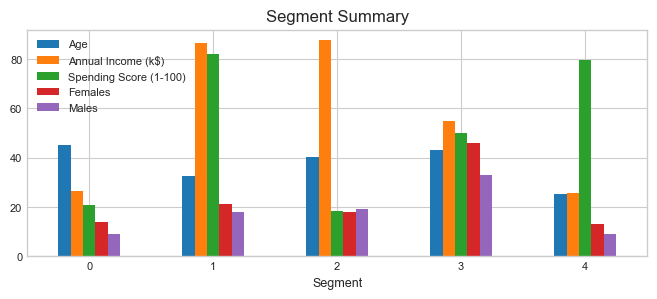

In [1306]:
df1_analysis.drop(['Segment','Count', '%'], axis=1).plot(kind='bar', legend=True, rot=0, figsize=(8,3))
plt.title("Segment Summary")
plt.xlabel('Segment')

Segement 1: Older customers with low income and spending score (We saw earlier that age and spending scores are negatively related and this confirmes that correlation) - Low Prospect Customers due to low purchasing power 

Segment 2: Middle-aged customers with high income and high spending scores - Top Spending Customers due to high purchasing power and willingness to spend (second-largest segment)

Segment 3: Middle-aged customers with high income but low spending scores - High Prospect customers due to low willingness to spend despite having high purchasing power

Segment 4: A little older than Segments 2 & 3 with moderate income and spending scores - Medium prospect customers (largest segment)

Segment 5: Younger consumers with low income and high spending scores - (smallest segment)

All segments have roughly similar number of males and females, except segment 4 has more females than males. 

In [1307]:
df1_analysis.rename(index={
    0: 'Low Prospect',
    1: 'Top Spenders - High Income',
    2: 'High Prospect',
    3: 'Medium Prospect',
    4: 'Top Spenders - Low Income'
}, inplace=True)

Text(0.5, 1.0, 'Segment Sizes')

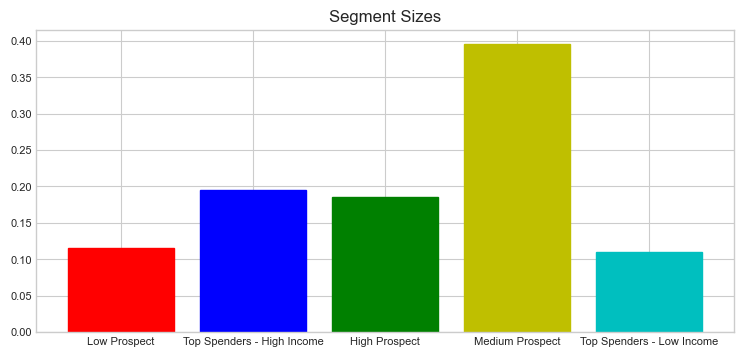

In [1328]:
plt.figure(figsize=(9,4))
barlist = plt.bar(df1_analysis.index, df1_analysis["%"])
barlist[0].set_color('r')
barlist[1].set_color('b')
barlist[2].set_color('g')
barlist[3].set_color('y')
barlist[4].set_color('c')
plt.title("Segment Sizes")

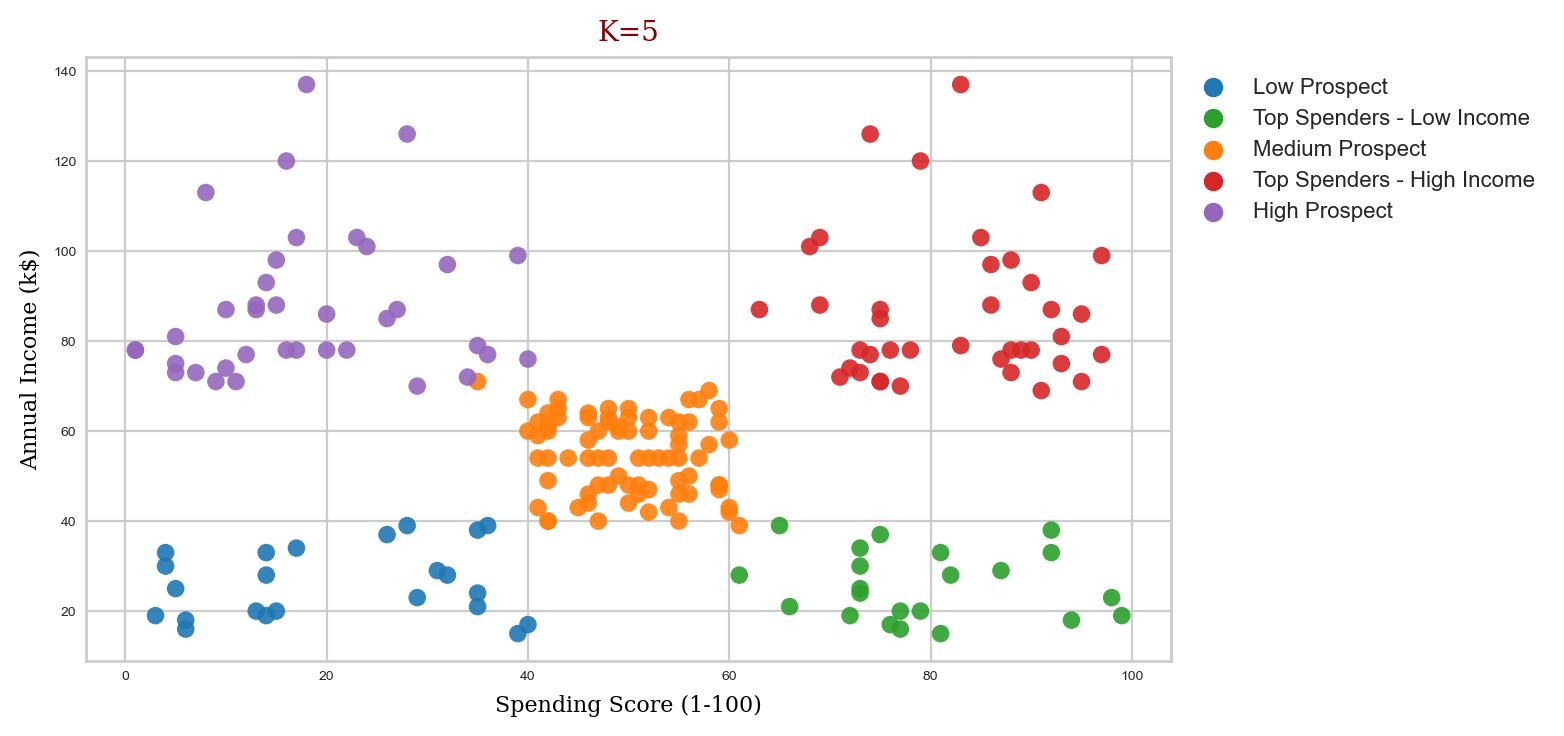

In [1309]:
# Concluding Plot

plt.figure(figsize=(7,4), dpi=200)
    
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(df1)
df1_kmeans = df1.copy()
df1_kmeans['Segment'] = kmeans.labels_  
    
segments = {
    0: 'Low Prospect',
    1: 'Top Spenders - High Income',
    2: 'High Prospect',
    3: 'Medium Prospect',
    4: 'Top Spenders - Low Income'}

df1_kmeans['Segment'] = df1_kmeans['Segment'].apply( lambda x : segments[x])

sns.scatterplot(
        x=df1_kmeans['Spending Score (1-100)'],
        y=df1_kmeans['Annual Income (k$)'],
        hue=df1_kmeans['Segment'], legend=True, s=40,
        linewidth=0, alpha=0.9, palette=['tab:blue', 'tab:green', 
                                         'tab:orange', 'tab:red',
                                         'tab:purple'])

font = {'family': 'serif','color':  'darkred','weight': 'normal','size': 10,}

font2 = {'family': 'serif','color':  'black','weight': 'normal','size': 8,}

plt.title("K=5", fontdict=font)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.xlabel("Spending Score (1-100)", fontdict=font2)
plt.ylabel('Annual Income (k$)', fontdict=font2)
plt.legend(bbox_to_anchor=(1,1))

plt.show()